## Proyecto EDA - Accidentalidad de Madrid

Este EDA va sobre la accidental de la cuidad de Madrid en los años 2020, 2021, 2022, 2023, 2024 y 2025. Los Dataset han diso descargados de la web....

- Librerias importantes que necesitamos en el EDA:

In [4]:
2+4

6

In [5]:
import pandas as pd
import os
import glob
import numpy as np
pd.options.mode.copy_on_write=True

- Primero vamos hacer una exploracion de las varibales que tenemos.

- Explorando el Dataset nos damos cuenta que hay varios numeros de expedientes iguales y la conclusion es que hay un num expediente por persona implicada en el accidente y es importante entender esto porque puede afectar al calculo de numero de accidentes, ademas que si hay varias personas implicadas en el acidente puede ser que haya personas que salgan leves, graves,etc

#### **Agrupación de variables por tipo de análisis**

 #### 1. EDA Temporal
    Columnas útiles: fecha, hora

- Distribución de accidentes por día, mes, día de la semana
- Accidentes por franja horaria
- Identificar horas pico
- Accidentes en madrugada, mañana, tarde y noche
- Evolución diaria

    *Preguntas guía:*
- ¿A qué horas ocurren más accidentes?
- ¿Hay patrones nocturnos asociados a alcohol/drogas?
- ¿Hay días con más siniestros?

#### 2. EDA Geográfico
    Columnas: distrito, cod_distrito, localizacion

- Accidentes por distrito
- Puntos negros (localizaciones repetidas)
- Mapa de calor de accidentes (heatmap) 

    *Preguntas guía:*
- ¿Qué distritos concentran más accidentes?
- ¿Qué intersecciones aparecen repetidas?

#### 3. EDA demográfico o por tipo de persona
    columnas: sexo, rango_edad, tipo_persona
- Distribución por edad
- Distribución por sexo
- Tipo de persona (conductor, pasajero, peatón)

    *Preguntas guía:*
- ¿Qué grupos de edad aparecen más?
- ¿Hay diferencias entre hombres y mujeres?
- ¿Quién es la persona implicada? ¿Cual es su rol?

#### 4. EDA por factores asociados al accidente
    Columnas: tipo_accidente, estado_meteorológico, tipo_vehiculo, positivo_alcohol

- Frecuencia de cada tipo de accidente
- Número de accidentes por estado meteorológico
- Distribución por tipo de vehículo
- Positivo_alcohol

    *Preguntas guía:*
- ¿Qué tipo de accidente es más común?
- ¿En que condiciones cilmáticas se producen más accidentes?
- ¿Qué vehículos tienen más siniestros?


#### 5. EDA de Lesividad (muy importante)
Columnas: cod_lesividad, lesividad
- Distribución Severidad de los accidentes




## Exploracion Inicial

Este Dataset es administrativo no estadistico, lo cual quiere decir que cada columna tiene un significado legal o procedimental, aqui un nulo no es un error, sino un estado administrativo, no puedes inventar datos porque alteras la realidad del registro.



La exploracion incial sirve para entender la estructura del Dataset antes de analizar cada variable, aqui no se tranfroma nada solo se observa.

## 2024

- Primero cargamos el dataset de acccidentalidad de madrid del año 2024:

In [6]:
df_accidentes_2024 = pd.read_csv(
    "./Datasets/2024_Accidentalidad.csv",
    sep=";",
    skip_blank_lines=True,
    on_bad_lines="skip",
    encoding="utf-8"
)



Ahora tambien quiero ver sus dimensiones, es decir cuantas filas y columnas tiene el Dataset

In [7]:
df_accidentes_2024.shape

(49340, 19)

- Aqui observamos que tenemos 19 columnas y 49340 filas.

Ahora para el formato real de los datos y detectar valores a simple vista

In [8]:
df_accidentes_2024.head()

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga
0,2023S040280,04/01/2024,14:09:00,AVDA. NICETO ALCALA ZAMORA / AUTOV. M-11,3,16,HORTALEZA,Colisión fronto-lateral,Lluvia débil,Motocicleta > 125cc,Conductor,De 55 a 59 años,Hombre,2.0,Ingreso inferior o igual a 24 horas,444913.0,4481427.0,N,NaN
1,2023S040280,04/01/2024,14:09:00,AVDA. NICETO ALCALA ZAMORA / AUTOV. M-11,3,16,HORTALEZA,Colisión fronto-lateral,Lluvia débil,Turismo,Conductor,De 55 a 59 años,Mujer,14.0,Sin asistencia sanitaria,444913.0,4481427.0,N,NaN
2,2023S040309,15/02/2024,14:05:00,CALL. TESORO / CALL. MINAS,18,1,CENTRO,Colisión fronto-lateral,Lluvia débil,Bicicleta,Conductor,De 25 a 29 años,Hombre,7.0,Asistencia sanitaria sólo en el lugar del acci...,440123.0,4475170.0,N,NaN
3,2023S040309,15/02/2024,14:05:00,CALL. TESORO / CALL. MINAS,18,1,CENTRO,Colisión fronto-lateral,Lluvia débil,Motocicleta hasta 125cc,Conductor,De 35 a 39 años,Hombre,14.0,Sin asistencia sanitaria,440123.0,4475170.0,N,NaN
4,2023S040310,18/02/2024,10:40:00,GTA. RUIZ JIMENEZ / CALL. SAN BERNARDO,3,7,CHAMBERÍ,Colisión lateral,Despejado,Turismo,Conductor,De 25 a 29 años,Hombre,NaN,NaN,440137.0,4475721.0,N,NaN


Ahora para saber si cada columna esta en el tipo correcto y dectar problemas como por ejemplo numeros como textos, fechas mal cargadas, booleanos como strings,etc.


In [9]:
df_accidentes_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49340 entries, 0 to 49339
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   num_expediente        49340 non-null  object 
 1   fecha                 49340 non-null  object 
 2   hora                  49340 non-null  object 
 3   localizacion          49340 non-null  object 
 4   numero                49340 non-null  object 
 5   cod_distrito          49340 non-null  int64  
 6   distrito              49340 non-null  object 
 7   tipo_accidente        49335 non-null  object 
 8   estado_meteorológico  43424 non-null  object 
 9   tipo_vehiculo         48946 non-null  object 
 10  tipo_persona          49340 non-null  object 
 11  rango_edad            49340 non-null  object 
 12  sexo                  49340 non-null  object 
 13  cod_lesividad         27344 non-null  float64
 14  lesividad             27344 non-null  object 
 15  coordenada_x_utm   

Aqui procedemos hacer una copia del dataset para dejar el original tal cual y poder ver diferencias a la hora de limpiar y demas.

In [10]:
df_accidentes_2024_copy=df_accidentes_2024.copy()

Vamos a generar una tabla para ver los nulos y la cardinalidad de las diferentes variables que nos ayudaran a tomar decisiones con cada variable.
- La cardinalidad de las diferentes variables para decidir cuales son categoricas o no. Se calcula de la siguiente manera: 
$$Cardinalidad(<Columna/Característica>) = \dfrac{NúmerodeValoresUnicos(<Columna/Característica>)}{NúmeroTotalDeRegistros}* 100\%$$

In [11]:
# Número de nulos 
nulos = df_accidentes_2024_copy.isna().sum() 
# Porcentaje de nulos 
nulos_pct = (nulos / len(df_accidentes_2024_copy) * 100).round(2) 
# Cardinalidad 
card = df_accidentes_2024_copy.nunique() 
# Porcentaje de cardinalidad 
card_pct = (card / len(df_accidentes_2024_copy) * 100).round(2) 
# Tipo de dato 
tipos = df_accidentes_2024_copy.dtypes 
#Construcción de la tabla 
tabla_eda = pd.DataFrame({ 
    "nulos": nulos,
    "% nulos": nulos_pct,
    "cardinalidad": card, 
    "% cardinalidad": card_pct,
    "tipo": tipos }) 
# Ordenar por cardinalidad (o por nulos si prefieres) 
tabla_eda = tabla_eda.sort_values("cardinalidad", ascending=False) 
tabla_eda

,nulos,% nulos,cardinalidad,% cardinalidad,tipo
num_expediente,0,0.00,20698,41.95,object
localizacion,0,0.00,15131,30.67,object
coordenada_y_utm,6,0.01,10997,22.29,float64
coordenada_x_utm,6,0.01,10131,20.53,float64
numero,0,0.00,1759,3.57,object
hora,0,0.00,1256,2.55,object
fecha,0,0.00,366,0.74,object
tipo_vehiculo,394,0.80,32,0.06,object
cod_distrito,0,0.00,21,0.04,int64
distrito,0,0.00,21,0.04,object


-Calculo la caridnalidad de la varibale antes de tratar los nulos porque sino estaria alternando artificalmente la cardinalidad de las variables.

-A partir de aqui tomo decisiones para modificar las variables al tipo que creemos mas acertado.

| Variable          | Tipo original | Tipo final             | Descripción                        | Importancia | Notas | 
|-------------------|---------------|------------------------|------------------------------------|-------------|-------| 
|num_expediente     | object        | string                 | Identificador único del expediente | Baja        | Cardinalidad muy alta, no se analiza, solo ID. | 
|fecha | object | datetime | Fecha del accidente | Alta | Necesaria para análisis temporal. | 
| hora | object | datetime.time | Hora del accidente | Alta | Pandas no tiene dtype específico; se mantiene como time. | 
| fecha_hora | derivada | datetime | Combinación de fecha y hora | Alta | Útil para análisis temporal preciso. | 
| localizacion | object | string | Dirección o punto exacto del accidente | Media | Cardinalidad muy alta; no convertir a category. | 
| numero | object | string | Número de la vía | Baja | No es numérico real, parte de la dirección. | 
| cod_distrito | int64 | category | Código numérico del distrito | Media | Categórica nominal; cardinalidad baja. | 
| distrito | object | category | Nombre del distrito | Alta | Variable clave para análisis espacial. | 
| tipo_accidente | object | category | Tipo de accidente | Alta | Cardinalidad baja; categórica nominal. | 
| estado_meteorológico | object | category | Condición meteorológica | Media | Imputada con 'No consta', categórica nominal. | 
| tipo_vehiculo | object | category | Tipo de vehículo implicado | Alta | Cardinalidad media, categórica nominal. | 
| tipo_persona | object | category | Rol de la persona (conductor, peatón...) | Alta | Categórica nominal. | 
| rango_edad | object | category (ordinal) | Rango de edad | Alta | Tiene orden natural, convertir a ordinal. | 
| sexo | object | category | Sexo de la persona | Media | Categórica nominal. | 
| cod_lesividad | float64 | category (ordinal) | Código de gravedad | Alta | Representa niveles de gravedad, imputado. | 
| lesividad | object | category (ordinal) | Gravedad del accidente | Alta | Variable clave, orden natural. | 
| coordenada_x_utm | float64 | float64 | Coordenada UTM X | Alta | Numérica continua, útil para mapas. | 
| coordenada_y_utm | float64 | float64 | Coordenada UTM Y | Alta | Numérica continua, útil para mapas. | 
| positiva_alcohol | object | category | Resultado alcohol | Media | Binaria + 'No consta'. | 
| positiva_droga | int64 | category | Resultado drogas | Baja | Cardinalidad 1 → variable inútil, se puede eliminar. |

In [12]:
df_accidentes_2024_copy["fecha"] = pd.to_datetime(df_accidentes_2024_copy["fecha"], errors="coerce", dayfirst=True) 
df_accidentes_2024_copy["hora"] = pd.to_datetime(df_accidentes_2024_copy["hora"], format="%H:%M:%S", errors="coerce").dt.time 
df_accidentes_2024_copy["fecha_hora"] = df_accidentes_2024_copy.apply( 
                            lambda row: pd.Timestamp.combine(row["fecha"], row["hora"])
                            if pd.notnull(row["fecha"]) and pd.notnull(row["hora"])
                            else pd.NaT,
                            axis=1 )

cols_string = ["num_expediente", "localizacion", "numero"] 
for col in cols_string: 
    df_accidentes_2024_copy[col] = df_accidentes_2024_copy[col].astype(str).str.lower().str.strip().str.replace(r"\s+", " ", regex=True)
    

- Ahora vamos a tratar los nulos 

In [13]:

# 1. ESTADO METEOROLÓGICO
df_accidentes_2024_copy['estado_meteorológico'] = (
    df_accidentes_2024_copy['estado_meteorológico'].fillna('Se desconoce')
)

# 2. TIPO VEHÍCULO
mask_no_aplica = df_accidentes_2024_copy['tipo_persona'].str.lower().isin(['peatón', 'testigo'])

# Peatón y testigo → No aplica
df_accidentes_2024_copy.loc[
    mask_no_aplica & df_accidentes_2024_copy['tipo_vehiculo'].isna(),
    'tipo_vehiculo'
] = 'No aplica'

# El resto de nulos → No consta
df_accidentes_2024_copy['tipo_vehiculo'] = (
    df_accidentes_2024_copy['tipo_vehiculo'].fillna('No consta')
)

# 3. LESIVIDAD (ORDINAL)
df_accidentes_2024_copy['cod_lesividad'] = df_accidentes_2024_copy['cod_lesividad'].fillna(14)
df_accidentes_2024_copy['lesividad'] = df_accidentes_2024_copy['lesividad'].fillna('Sin asistencia sanitaria')

# 4. ALCOHOL Y DROGAS
df_accidentes_2024_copy['positiva_alcohol'] = df_accidentes_2024_copy['positiva_alcohol'].fillna('No consta')
df_accidentes_2024_copy['positiva_droga'] = df_accidentes_2024_copy['positiva_droga'].fillna('No consta')

# 5. NÚMERO
df_accidentes_2024_copy['numero'] = df_accidentes_2024_copy['numero'].fillna('No aplica')

# 6. TIPO DE ACCIDENTE
if 'tipo_accidente' in df_accidentes_2024_copy.columns:
    df_accidentes_2024_copy['tipo_accidente'] = (
        df_accidentes_2024_copy['tipo_accidente'].fillna('No consta')
    )
# 7. NUEVA COLUMNA: GRADO DE LESIVIDAD

# Diccionario de mapeo cod_lesividad → grado de lesividad
mapa_grado_lesividad = {
    1: "Leve",
    2: "Leve",
    3: "Grave",
    4: "Fallecido",
    5: "Leve",
    6: "Leve",
    7: "Leve",
    14: "Sin asistencia sanitaria",
    77: "Se desconoce"
}

# Crear nueva columna con el grado de lesividad
df_accidentes_2024_copy['grado_lesividad'] = (
    df_accidentes_2024_copy['cod_lesividad']
    .map(mapa_grado_lesividad)
    .fillna("Se desconoce")   # por si aparece algún código no contemplado
)

# Eliminamos 'positiva_droga' por tener un 99.6% de nulos y no aportar valor analítico
df_accidentes_2024_copy = df_accidentes_2024_copy.drop(columns=["positiva_droga"])

# 8. NORMALIZAR VALORES DE ALCOHOL (S/N → Positivo/Negativo)
mapa_alcohol = {
    "S": "Positivo",
    "N": "Negativo",
    "No consta": "No consta",
}

df_accidentes_2024_copy["positiva_alcohol"] = (
    df_accidentes_2024_copy["positiva_alcohol"]
    .map(mapa_alcohol)
    .fillna("No consta")   # por si aparece algún valor inesperado
)



- Eliminamos la columna drogas porque hay muchisimos nulos y no podemos imputar que los NAN sea a que sea negativa la prueba porque podria ser que no le han hecho la prueba de drogas con lo cual lo mejor es borrarla porque nos da muy poca informacion.

In [14]:
# 6. CONVERTIR A CATEGORY (DESPUÉS DE IMPUTAR) 
cols_category = [ 'estado_meteorológico', 
                 'tipo_vehiculo', 
                 'tipo_persona', 
                 'tipo_accidente', 
                 'distrito', 
                 'cod_distrito', 
                 'rango_edad', 
                 'sexo', 
                 'cod_lesividad', 
                 'lesividad', 
                 'positiva_alcohol', 
                 'grado_lesividad'
                 ] 
for col in cols_category: 
    df_accidentes_2024_copy[col] = df_accidentes_2024_copy[col].astype('category')

In [15]:
df_accidentes_2024_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49340 entries, 0 to 49339
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   num_expediente        49340 non-null  object        
 1   fecha                 49340 non-null  datetime64[ns]
 2   hora                  49340 non-null  object        
 3   localizacion          49340 non-null  object        
 4   numero                49340 non-null  object        
 5   cod_distrito          49340 non-null  category      
 6   distrito              49340 non-null  category      
 7   tipo_accidente        49340 non-null  category      
 8   estado_meteorológico  49340 non-null  category      
 9   tipo_vehiculo         49340 non-null  category      
 10  tipo_persona          49340 non-null  category      
 11  rango_edad            49340 non-null  category      
 12  sexo                  49340 non-null  category      
 13  cod_lesividad   

Aqui vemos que tenemos coordenadas X e Y con nulos por lo que hago un dataframe con ellos y busco su latitud y longitud para luego pasarlos a coordanadas X e Y.

In [ ]:
df_nulos_geo = df_accidentes_2024_copy[
    df_accidentes_2024_copy[['coordenada_x_utm', 'coordenada_y_utm']].isna().any(axis=1)
]
df_nulos_geo


In [ ]:
df_accidentes_2024.tipo_persona.value_counts()

In [ ]:
df_accidentes_2024.rango_edad.value_counts()

In [ ]:
df_accidentes_2024.sexo.value_counts()

Aqui como veo las calles con los numeros vamos a buscar en google maps la longitud y la laitud de todas ellas y la trasnformamos esa latitud y longitud en x e y. Calles:

calle sagasta 12, madrid:
- Latitud:40.42861807197678 
- Longitud:-3.700140607183193

calle de los yebenes, 78:
- Latitud: 40.39365616234982, 
- Longitud: -3.7525037200398446

In [16]:
coords = {
    "2024s033186": (440948.3, 4474040.4),  # Sagasta 12
    "2024s034459": (436742.2, 4469836.7)   # Los Yébenes 78
}

for exp, (x, y) in coords.items():
    df_accidentes_2024_copy.loc[
        df_accidentes_2024_copy['num_expediente'] == exp,
        'coordenada_x_utm'
    ] = x

    df_accidentes_2024_copy.loc[
        df_accidentes_2024_copy['num_expediente'] == exp,
        'coordenada_y_utm'
    ] = y

    print(f"✅ Expediente {exp} actualizado → X={x}, Y={y}")


✅ Expediente 2024s033186 actualizado → X=440948.3, Y=4474040.4
✅ Expediente 2024s034459 actualizado → X=436742.2, Y=4469836.7


-Ahora eliminamos las demas que son contradictorias o no podemos encontrar 

In [17]:
expedientes_a_eliminar = [
    "2024s031973",
    "2024s033213",
    "2024s033868"
]

df_accidentes_2024_copy = df_accidentes_2024_copy[
    ~df_accidentes_2024_copy["num_expediente"].isin(expedientes_a_eliminar)
].copy()

print("🗑️ Filas eliminadas:", expedientes_a_eliminar)


🗑️ Filas eliminadas: ['2024s031973', '2024s033213', '2024s033868']


-Aqui compruebo que el dataset queda ya completamente limpio

In [18]:
df_accidentes_2024_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49337 entries, 0 to 49339
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   num_expediente        49337 non-null  object        
 1   fecha                 49337 non-null  datetime64[ns]
 2   hora                  49337 non-null  object        
 3   localizacion          49337 non-null  object        
 4   numero                49337 non-null  object        
 5   cod_distrito          49337 non-null  category      
 6   distrito              49337 non-null  category      
 7   tipo_accidente        49337 non-null  category      
 8   estado_meteorológico  49337 non-null  category      
 9   tipo_vehiculo         49337 non-null  category      
 10  tipo_persona          49337 non-null  category      
 11  rango_edad            49337 non-null  category      
 12  sexo                  49337 non-null  category      
 13  cod_lesividad        

- Aqui mostramos todo el dataFrame con las columnas con Dtype bien puesto y sin nulos, dejando limpio el dataFrame para el analisis.

In [19]:
df_accidentes_2024_copy.head()

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,fecha_hora,grado_lesividad
0,2023s040280,2024-01-04,14:09:00,avda. niceto alcala zamora / autov. m-11,3,16,HORTALEZA,Colisión fronto-lateral,Lluvia débil,Motocicleta > 125cc,Conductor,De 55 a 59 años,Hombre,2.0,Ingreso inferior o igual a 24 horas,444913.0,4481427.0,Negativo,2024-01-04 14:09:00,Leve
1,2023s040280,2024-01-04,14:09:00,avda. niceto alcala zamora / autov. m-11,3,16,HORTALEZA,Colisión fronto-lateral,Lluvia débil,Turismo,Conductor,De 55 a 59 años,Mujer,14.0,Sin asistencia sanitaria,444913.0,4481427.0,Negativo,2024-01-04 14:09:00,Sin asistencia sanitaria
2,2023s040309,2024-02-15,14:05:00,call. tesoro / call. minas,18,1,CENTRO,Colisión fronto-lateral,Lluvia débil,Bicicleta,Conductor,De 25 a 29 años,Hombre,7.0,Asistencia sanitaria sólo en el lugar del acci...,440123.0,4475170.0,Negativo,2024-02-15 14:05:00,Leve
3,2023s040309,2024-02-15,14:05:00,call. tesoro / call. minas,18,1,CENTRO,Colisión fronto-lateral,Lluvia débil,Motocicleta hasta 125cc,Conductor,De 35 a 39 años,Hombre,14.0,Sin asistencia sanitaria,440123.0,4475170.0,Negativo,2024-02-15 14:05:00,Sin asistencia sanitaria
4,2023s040310,2024-02-18,10:40:00,gta. ruiz jimenez / call. san bernardo,3,7,CHAMBERÍ,Colisión lateral,Despejado,Turismo,Conductor,De 25 a 29 años,Hombre,14.0,Sin asistencia sanitaria,440137.0,4475721.0,Negativo,2024-02-18 10:40:00,Sin asistencia sanitaria


## Analisis Univariante 2024

#### Analisis univariante temporal. Nuestros objetivos seran los siguientes:

- Accidentes por hora que mostraran picos en horas puntas.
- Accidentes por dia de la semana, nos mostrara los dias de las semana donde habra mas accideentes.
- Accidentes por franja horaria, que nos mostrara donde son mas comunes los accidentes si por la mañana, tarde, noche o madrugada.
- Accidentes globales, nos mostrara los accidentes de cada mes en todo año.
- Accidentes por dia, que detectara los dias en los que hay mas accidentes.

Realizo una copia del dataFrame para el analisis univariante.

In [20]:
df_accidentes_2024_copy_univariante=df_accidentes_2024_copy.copy()

La función preparar_accidentes_unicos() transforma un dataset de personas implicadas en un dataset de accidentes únicos.  
Agrupa por num_expediente, selecciona una fila por accidente, agrega información relevante y genera variables temporales (año, mes, día de la semana, hora y franja horaria).

In [21]:
def preparar_accidentes_unicos(df, col_id='num_expediente'):
    """
    Devuelve un DataFrame con accidentes únicos (agregados por num_expediente),
    usando la columna fecha_hora ya existente.
    """

    # Asegurar que fecha_hora es datetime
    df['fecha_hora'] = pd.to_datetime(df['fecha_hora'], errors='coerce')

    # Agregación por expediente (1 fila = 1 accidente)
    df_unicos = df.groupby(col_id).agg({
        'fecha_hora': 'min',
        'tipo_accidente': 'first',
        'tipo_vehiculo': lambda x: list(x.unique()),
        'distrito': 'first',
        'estado_meteorológico': 'first',
        'rango_edad': 'first',
        'tipo_persona': 'first',
        'sexo': 'first',
        'positiva_alcohol': 'first'
    }).reset_index()

    # Variables temporales derivadas
    df_unicos['año'] = df_unicos['fecha_hora'].dt.year
    df_unicos['mes'] = df_unicos['fecha_hora'].dt.month
    df_unicos['dia_semana'] = df_unicos['fecha_hora'].dt.day_name()
    df_unicos['hora'] = df_unicos['fecha_hora'].dt.hour

    df_unicos['franja'] = pd.cut(
        df_unicos['hora'],
        bins=[0,6,12,18,24],
        labels=['Madrugada','Mañana','Tarde','Noche'],
        right=False
    )

    return df_unicos


La funcion plot_temporal_univariante genera todos los gráficos temporales univariantes clave para analizar accidentes:
- Por mes
- Por día de la semana
- Por hora
- Por franja horaria y una curva mensual

In [22]:
import matplotlib.pyplot as plt

def plot_temporal_univariate(df, col_datetime='fecha_hora', por_año=False):
    """
    Gráficos temporales univariantes:
    - Accidentes por mes (barras)
    - Accidentes por día de la semana
    - Accidentes por hora
    - Accidentes por franja horaria
    - Curva mensual ampliada (línea con puntos)
    - Curvas diarias por mes (12 gráficas adicionales)
    """
    if por_año:
        for año, df_año in df.groupby('año'):
            print(f"\n=== Gráficos para el año {año} ===")
            _graficos(df_año, col_datetime, titulo_extra=f"Año {año}")
    else:
        _graficos(df, col_datetime, titulo_extra="Global")


def _graficos(df, col_datetime, titulo_extra=""):

    fig = plt.figure(figsize=(16, 18))

    # 1. Accidentes por mes
    ax_mes = plt.subplot2grid((3, 2), (0, 0))
    freq_mes = df['mes'].value_counts().sort_index()
    freq_mes.plot(kind='bar', ax=ax_mes, color="steelblue",
                  title=f'Accidentes por mes ({titulo_extra})')
    ax_mes.set_ylabel("Número de accidentes")
    for i, v in enumerate(freq_mes.values):
        ax_mes.text(i, v + 5, str(v), ha="center", fontsize=9)

    # 2. Accidentes por día de la semana
    ax_semana = plt.subplot2grid((3, 2), (0, 1))
    freq_semana = df['dia_semana'].value_counts()
    freq_semana.plot(kind='bar', ax=ax_semana, color="darkcyan",
                     title=f'Accidentes por día de la semana ({titulo_extra})')
    ax_semana.set_ylabel("Número de accidentes")
    for i, v in enumerate(freq_semana.values):
        ax_semana.text(i, v + 5, str(v), ha="center", fontsize=9)

    # 3. Accidentes por hora
    ax_hora = plt.subplot2grid((3, 2), (1, 0))
    freq_hora = df['hora'].value_counts().sort_index()
    freq_hora.plot(kind='bar', ax=ax_hora, color="darkorange",
                   title=f'Accidentes por hora ({titulo_extra})')
    ax_hora.set_ylabel("Número de accidentes")
    for i, v in enumerate(freq_hora.values):
        ax_hora.text(i, v + 5, str(v), ha="center", fontsize=8)

    # 4. Accidentes por franja horaria
    ax_franja = plt.subplot2grid((3, 2), (1, 1))
    freq_franja = df['franja'].value_counts()
    freq_franja.plot(kind='bar', ax=ax_franja, color="mediumseagreen",
                     title=f'Accidentes por franja horaria ({titulo_extra})')
    ax_franja.set_ylabel("Número de accidentes")
    for i, v in enumerate(freq_franja.values):
        ax_franja.text(i, v + 5, str(v), ha="center", fontsize=9)

    # 5. Curva mensual ampliada
    ax_curva = plt.subplot2grid((3, 2), (2, 0), colspan=2)
    frecuencia_mensual = df[col_datetime].dt.month.value_counts().sort_index()

    meses_es = [
        "Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio",
        "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"
    ]
    meses_plot = [meses_es[i-1] for i in frecuencia_mensual.index]

    ax_curva.plot(
        meses_plot, frecuencia_mensual.values,
        marker="o", linewidth=3, color="steelblue"
    )
    ax_curva.set_title(f"Curva de frecuencia mensual ({titulo_extra})", fontsize=14)
    ax_curva.set_xlabel("Mes")
    ax_curva.set_ylabel("Número de accidentes")
    ax_curva.grid(True)
    for i, v in enumerate(frecuencia_mensual.values):
        ax_curva.text(i, v + 10, str(v), ha="center", fontsize=10)
    ax_curva.tick_params(axis="x", rotation=45)

    plt.tight_layout()
    plt.show()
    
    # 6. NUEVO: curvas diarias por mes (12 gráficas adicionales)
    
    for mes in range(1, 12 + 1):
        df_mes = df[df[col_datetime].dt.month == mes]
        if df_mes.empty:
            continue

        freq_dia = df_mes[col_datetime].dt.day.value_counts().sort_index()

        plt.figure(figsize=(10, 4))
        plt.plot(freq_dia.index, freq_dia.values, marker="o", linewidth=2, color="firebrick")
        plt.title(f"Curva diaria – {meses_es[mes-1]} ({titulo_extra})")
        plt.xlabel("Día del mes")
        plt.ylabel("Número de accidentes")
        plt.grid(True)

        for i, v in enumerate(freq_dia.values):
            plt.text(freq_dia.index[i], v + 0.5, str(v), ha="center", fontsize=8)

        plt.tight_layout()
        plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df_unicos = preparar_accidentes_unicos(df_accidentes_2024_copy_univariante)
plot_temporal_univariate(df_unicos)

En la primera grafica de todas de accidentes por mes se puede observar que el top tres de aacidentes por mes son:
- Octubre
- Diciembre
- Mayo
Tambien podemos observar que el mes con menos accidentes es claramente Agosto, esto tiene sentido ya que coincide con un mes muy tipico de vacacciones y madrid reduce mucho su poblacion en ese mes particularmente.

Grafica de accidente por dia de la semana

En esta grafica podemos observar que el dia de la semana con mas accidentes son los viernes.

Grafica de accidentes por hora:

En esta grafica observamos que sobre todo hay dos franjas donde hay mas accidenes que son entre las 14:00 y las 15:00 y las 18:00 y las 19:00.

Grafica de accidentes por fraja horaria:

En esta grafica observamos que cuando hay mas accidentes es por la tarde(Entendiendo la franja horaria de esta forma: madrugada de 24:00 a 6:00, mañana de 6:00 a 12:00, tarde de 12:00 a 18:00 y noche de 18:00 a 24:00)

Grafica de acidentes de frecuencia amensual:

observamos lo mismo que en el diagrama de barras de la primera grafica

##### Enero
Día 1 y 6 → valles claros (festivos)

- Repunte fuerte desde el día 9 → vuelta a la actividad

- Patrón típico post-Reyes

##### Febrero
Sin festivos → curva marcada por fines de semana

- Picos en días laborales (2, 9, 26) → patrón puro de movilidad

##### Marzo
Semana Santa cae en 28–29 marzo → descenso claro desde el 27

Picos antes del 20 → acumulación previa a vacaciones

##### Abril
- Semana Santa ya pasó → curva estable

- Picos en mitad de semana (10–12, 18–19) → actividad laboral normal

##### Mayo
- Día 1, 2 y 15 → tres festivos clave en Madrid

- Valles en esos días, picos justo después (10, 25, 27, 28)

- Patrón de “efecto rebote” tras puentes

##### Junio
- Sin festivos → curva estable

- Picos en jueves/viernes → tráfico laboral

- Inicio de verano escolar → más movilidad

##### Julio
- Descenso progresivo → inicio de vacaciones

- Picos en días laborales (5, 8, 12)

- Valles en fines de semana y segunda mitad

##### Agosto
- 15 agosto → valle claro (festivo nacional)

- Curva baja todo el mes → vacaciones masivas

- Picos aislados (1, 2, 5, 6) → desplazamientos puntuales

##### Septiembre
- Vuelta al cole y trabajo → repunte desde el día 4

- Picos en días laborales (6, 9, 12, 26, 27)

- Patrón de reincorporación

##### Octubre
- Día 12 → valle claro (festivo nacional)

- Picos en semanas completas (9, 16, 18, 30)

- Actividad laboral intensa

##### Noviembre
- Día 1 → valle claro (festivo nacional)

- Picos en segunda mitad (28–30) → acumulación de actividad

- Clima más adverso → más siniestros

##### Diciembre
- Días 6, 8, 25 → valles claros (festivos)

- Picos antes de Navidad (12–14, 18–20)

- Descenso final (29–31) → menos movilidad

#### Analisis univariante Geográfico. Nuestros objetivos seran los siguientes:
- Accidentes por distrito, ¿Que distritos tienen el mayor numero de accidentes?
- Puntos negros (localizaciones repetidas), ¿Donde se situan los puntos negros?

    
    

C:\Users\aquin\AppData\Local\Temp\ipykernel_17496\4225893700.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("distrito")["num_expediente"]


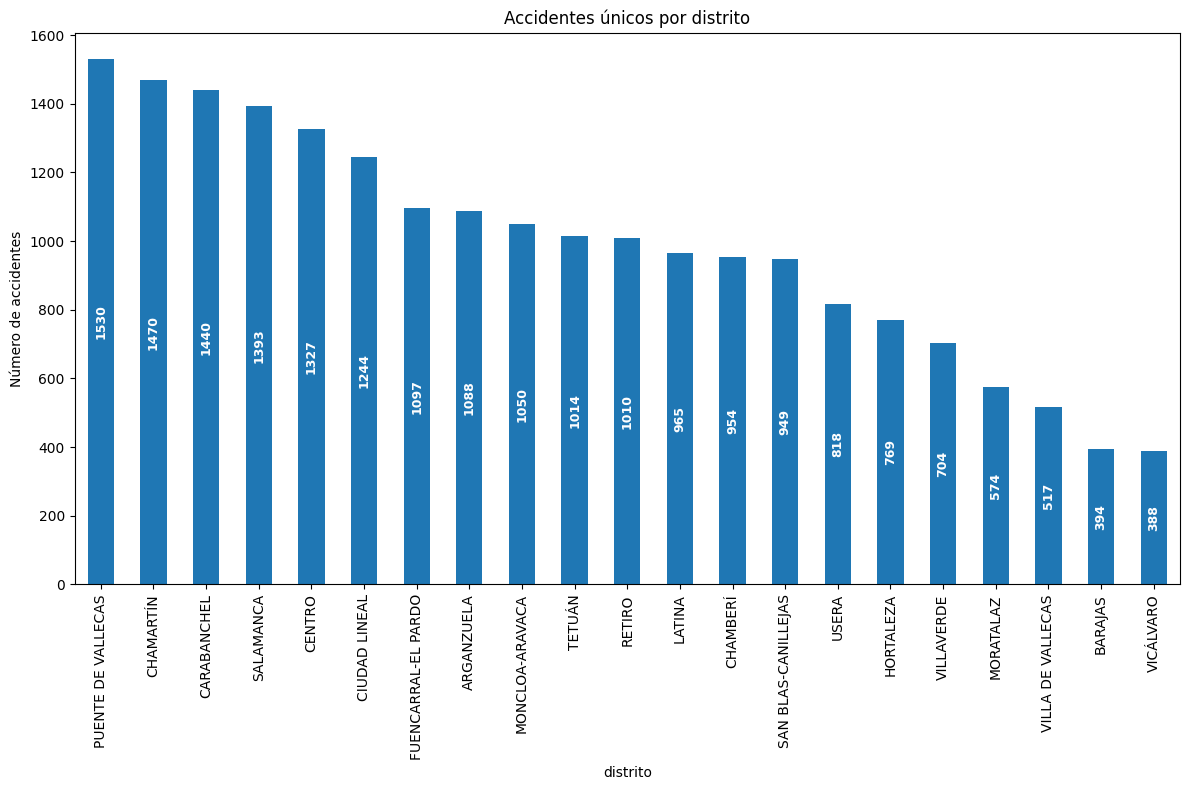

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Calcular accidentes únicos por distrito
accidentes_distrito = (
    df_accidentes_2024_copy_univariante
    .groupby("distrito")["num_expediente"]
    .nunique()
    .sort_values(ascending=False)
)

# Crear gráfico
ax = accidentes_distrito.plot(kind="bar", figsize=(12,8))

plt.title("Accidentes únicos por distrito")
plt.ylabel("Número de accidentes")

# Eje Y con saltos de 200
max_val = accidentes_distrito.max()
plt.yticks(np.arange(0, max_val + 200, 200))

# Añadir el número de accidentes dentro de cada barra, tumbado
for p, value in zip(ax.patches, accidentes_distrito):
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() / 2   # centrado verticalmente dentro de la barra

    ax.annotate(
        f"{value}",
        (x, y),
        ha="center", va="center",
        rotation=90,          #  texto tumbado
        fontsize=9, color="white", fontweight="bold"
    )

plt.tight_layout()
plt.show()


C:\Users\aquin\AppData\Local\Temp\ipykernel_17496\3192958038.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("distrito")["num_expediente"]


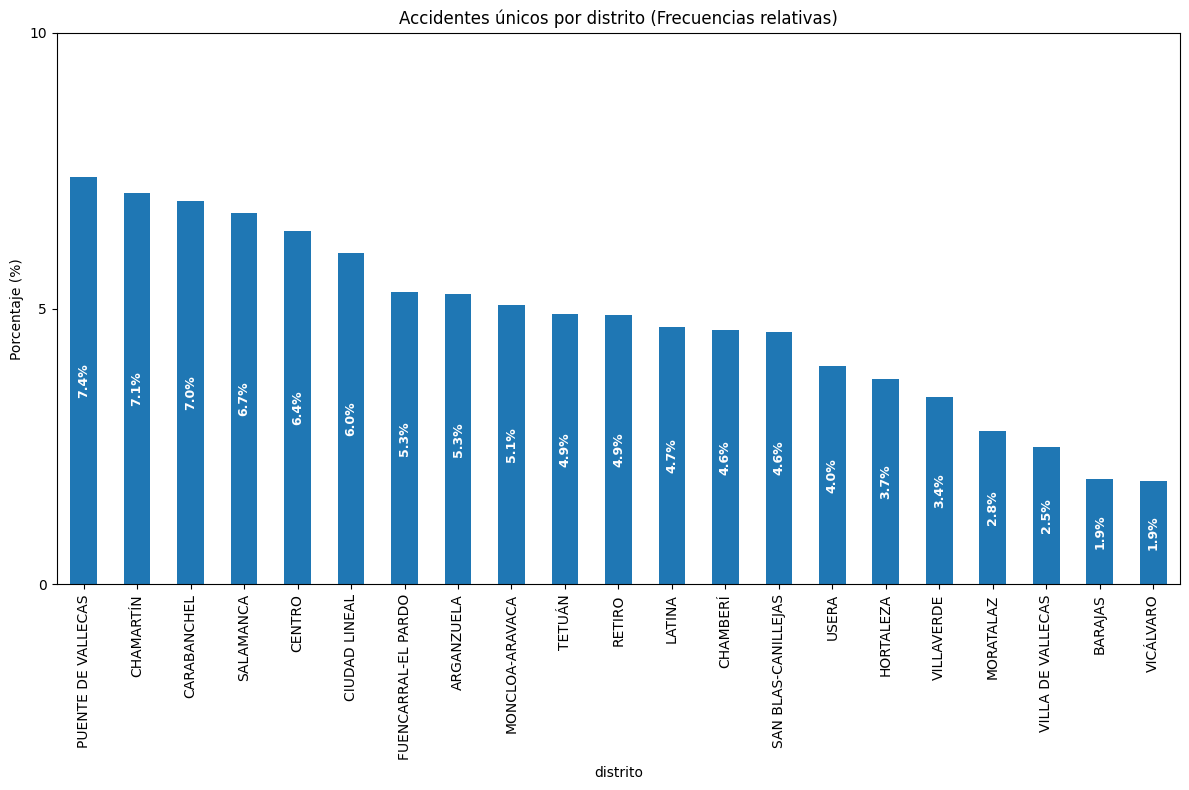

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Calcular accidentes únicos por distrito (absolutos)
accidentes_distrito = (
    df_accidentes_2024_copy_univariante
    .groupby("distrito")["num_expediente"]
    .nunique()
    .sort_values(ascending=False)
)

# Convertir a frecuencias relativas (%)
accidentes_rel = accidentes_distrito / accidentes_distrito.sum() * 100

# Crear gráfico
ax = accidentes_rel.plot(kind="bar", figsize=(12,8))

plt.title("Accidentes únicos por distrito (Frecuencias relativas)")
plt.ylabel("Porcentaje (%)")

# Eje Y con saltos de 5%
max_val = accidentes_rel.max()
plt.yticks(np.arange(0, max_val + 5, 5))

# Añadir el porcentaje dentro de cada barra, tumbado
for p, value in zip(ax.patches, accidentes_rel):
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() / 2   # centrado verticalmente dentro de la barra

    ax.annotate(
        f"{value:.1f}%",      # porcentaje con 1 decimal
        (x, y),
        ha="center", va="center",
        rotation=90,
        fontsize=9, color="white", fontweight="bold"
    )

plt.tight_layout()
plt.show()


Accidentes por distrito, ¿Que distritos tienen el mayor numero de accidentes?

- Puente de Vallecas lidera con 1530 accidentes únicos, seguido de Chamartín (1470) y Carabanchel (1440).

- Los distritos más céntricos como Centro, Salamanca, Retiro también presentan cifras elevadas.

- Distritos periféricos como Barajas (394) y Vicálvaro (388) tienen menor incidencia.


Frecuencia relativa:
- Puente de Vallecas representa el 7.4% del total de accidentes únicos.

- Chamartín y Carabanchel rondan el 7%, lo que indica una distribución bastante homogénea entre los distritos más activos.

- Los 10 primeros distritos concentran más del 50% de los accidentes.

Conclusión:

La siniestralidad vial está concentrada en distritos con alta densidad urbana y tráfico intenso, especialmente en zonas de acceso a grandes vías o con intersecciones complejas. Esto sugiere que la planificación urbana y el volumen de circulación son factores clave en la distribución de accidentes.

In [25]:
import pandas as pd
import unicodedata

# 1. Funciones de normalización
def normalize_text(s):
    """Normaliza texto: minúsculas, espacios, sin tildes."""
    if pd.isna(s):
        return None
    s = s.lower().strip()
    s = " ".join(s.split())  # elimina dobles espacios
    s = ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )
    return s

def normalize_numero(n):
    """Normaliza número de portal, detecta S/N."""
    if pd.isna(n):
        return None
    n = str(n).lower().strip()
    if n in ['s/n', 'sn', 's-n', '']:
        return None
    return n

# 2. Normalización de columnas clave


df = df_accidentes_2024_copy_univariante.copy()

df['localizacion_norm'] = df['localizacion'].apply(normalize_text)
df['numero_norm'] = df['numero'].apply(normalize_numero)
df['num_expediente'] = df['num_expediente'].astype(str).str.strip()

# eliminar duplicados exactos de num expediente
df = df.drop_duplicates(subset=['num_expediente'])


# 3. Construcción de clave de localización final


df['clave_localizacion'] = (
    df['localizacion_norm'].fillna('') + ' ' +
    df['numero_norm'].fillna('')
).str.strip()

# 4. Detección de puntos negros con distrito

puntos_negros = (
    df.groupby(['localizacion_norm', 'distrito'])['num_expediente']
      .nunique()
      .reset_index(name='n_expedientes')
      .sort_values('n_expedientes', ascending=False)
)

# filtrar solo localizaciones con más de un accidente distinto
puntos_negros = puntos_negros[puntos_negros['n_expedientes'] > 1]

# 5. Resultado final
puntos_negros




C:\Users\aquin\AppData\Local\Temp\ipykernel_17496\1316194620.py:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['localizacion_norm', 'distrito'])['num_expediente']


,localizacion_norm,distrito,n_expedientes
1602,"autov. a-2, +00500e",CIUDAD LINEAL,35
3209,"autov. a-42, +00500e",USERA,25
3215,"autov. a-42, +00500s",CARABANCHEL,22
5009,"autov. m-23, 0",MORATALAZ,22
152954,call. fuente carrantona / autov. m-23,MORATALAZ,22
...,...,...,...
45229,avda. doctor federico rubio y gali / avda. pab...,TETUÁN,2
9727,"autov. m-30, 04nc40",CHAMARTÍN,2
315882,"ronda. toledo, 2",ARGANZUELA,2
315948,"ronda. toledo, 3",CENTRO,2


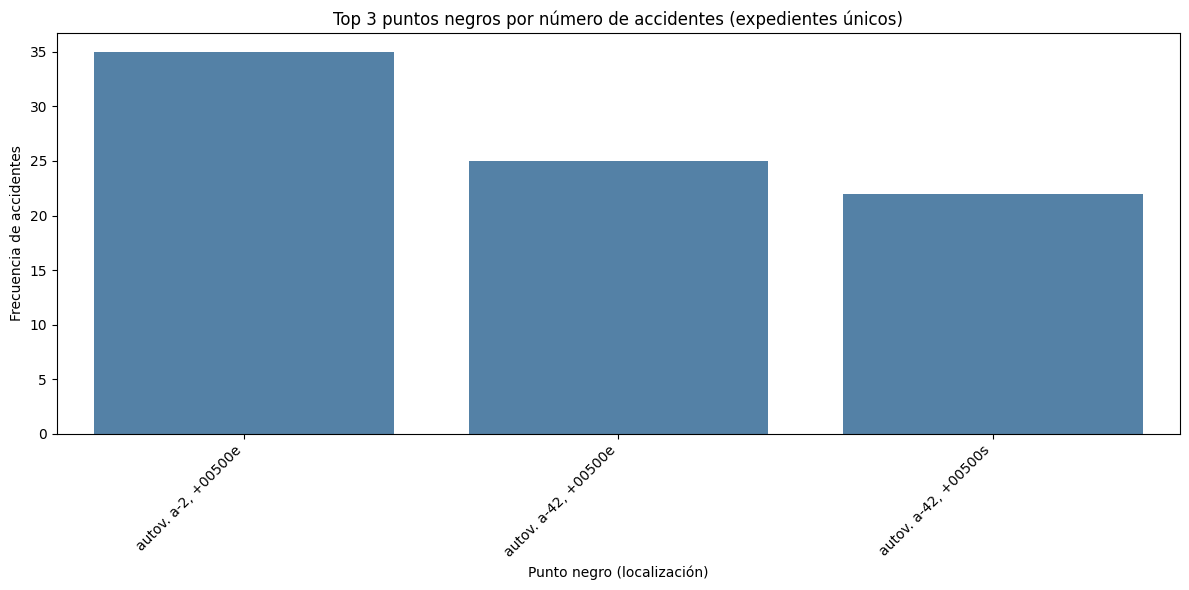

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar los 5 puntos negros con más accidentes
top3 = puntos_negros.nlargest(3, 'n_expedientes').copy()

# Resetear índice para evitar problemas de posición
top3 = top3.reset_index(drop=True)

plt.figure(figsize=(12, 6))

sns.barplot(
    data=top3,
    x='localizacion_norm',
    y='n_expedientes',
    color='steelblue'
)

plt.title('Top 3 puntos negros por número de accidentes (expedientes únicos)')
plt.xlabel('Punto negro (localización)')
plt.ylabel('Frecuencia de accidentes')

# Rotar etiquetas del eje X para que se lean bien
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


Puntos negros (localizaciones repetidas), ¿Donde se situan los puntos negros?

- Los tres puntos negros más destacados se localizan en tramos específicos de autovías, concretamente en la A‑2 y la A‑42, identificados por su referencia kilométrica. En el caso de la A‑2, el punto situado en el kilómetro +00500E, dentro del distrito de Ciudad Lineal, concentra 35 accidentes únicos, lo que evidencia una recurrencia significativa en ese mismo lugar. Por su parte, la A‑42 presenta dos tramos consecutivos con alta siniestralidad: uno en el kilómetro +00500E (Usera) y otro en +00500S (Carabanchel), con 25 y 22 accidentes respectivamente. Esta concentración de expedientes en puntos tan concretos sugiere la existencia de factores estructurales o de diseño que podrían estar contribuyendo a la peligrosidad de estos tramos, como accesos conflictivos, deficiencias de señalización o condiciones geométricas adversas.

- Los puntos negros detectados en la A‑2 y A‑42 son zonas de alta peligrosidad recurrente, probablemente asociadas a incorporaciones, cambios de rasante, curvas cerradas o falta de señalización. Estos tramos deberían ser prioridad en intervenciones de seguridad vial, ya que concentran múltiples accidentes únicos en el mismo lugar.

- Este formato es el que utiliza el Ayuntamiento/Policía para registrar accidentes en autovías, donde no existe un número de portal.
La localización se codifica con:

- Nombre de la vía: A‑2

- Referencia kilométrica: +00500

- Sentido: E

- Interpretación:
- A‑2 → Autovía del Nordeste (Madrid–Zaragoza–Barcelona)

- +00500 → Punto kilométrico 0,5 (500 metros desde el inicio del tramo urbano)

- E → Sentido Este, es decir, dirección salida de Madrid hacia Zaragoza

- Traducción práctica:  
- Accidente ocurrido en el PK 0,5 de la A‑2, sentido Zaragoza.

#### Analisis Univariante por tipo de accidente

- Frecuencia de cada tipo de accidente
- ¿Qué tipo de accidente es más común?


C:\Users\aquin\AppData\Local\Temp\ipykernel_17496\3789310623.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("tipo_accidente")["num_expediente"]


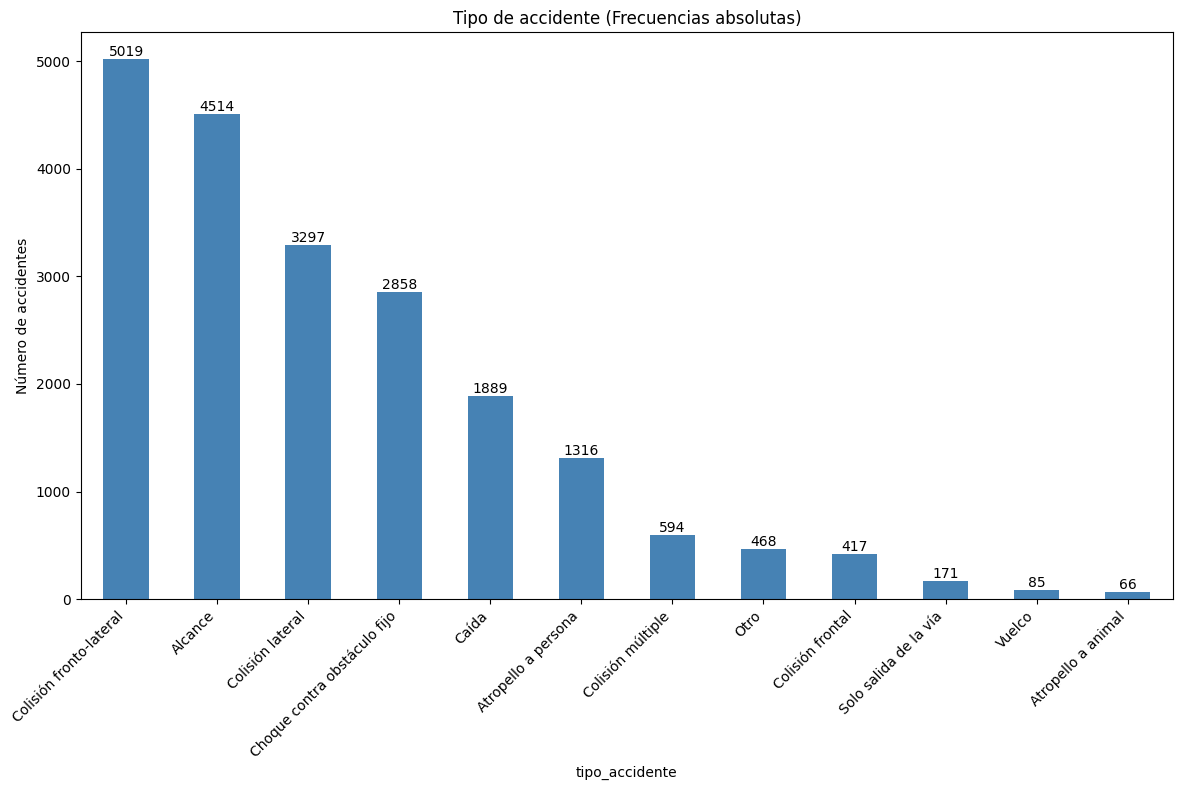

In [27]:
import matplotlib.pyplot as plt

# Crear columna limpia
df = df_accidentes_2024_copy_univariante.copy()
df["tipo_accidente_limpio"] = df["tipo_accidente"].str.strip().str.lower()

# Filtrar "no consta" 
df_filtrado = df[df["tipo_accidente_limpio"] != "no consta"]

# Calcular frecuencias absolutas
abs_freq = (
    df_filtrado
    .groupby("tipo_accidente")["num_expediente"]
    .nunique()
    .sort_values(ascending=False)
)

# Eliminar categorías con valor 0 
abs_freq = abs_freq[abs_freq > 0]

# Crear gráfico 
plt.figure(figsize=(12, 8))
abs_freq.plot(kind="bar", color="steelblue")

plt.title("Tipo de accidente (Frecuencias absolutas)")
plt.ylabel("Número de accidentes")
plt.xticks(rotation=45, ha="right")

# Etiquetas numéricas encima de cada barra
for i, v in enumerate(abs_freq):
    plt.text(i, v, f"{v}", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()




C:\Users\aquin\AppData\Local\Temp\ipykernel_17496\464933143.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("tipo_accidente")["num_expediente"]


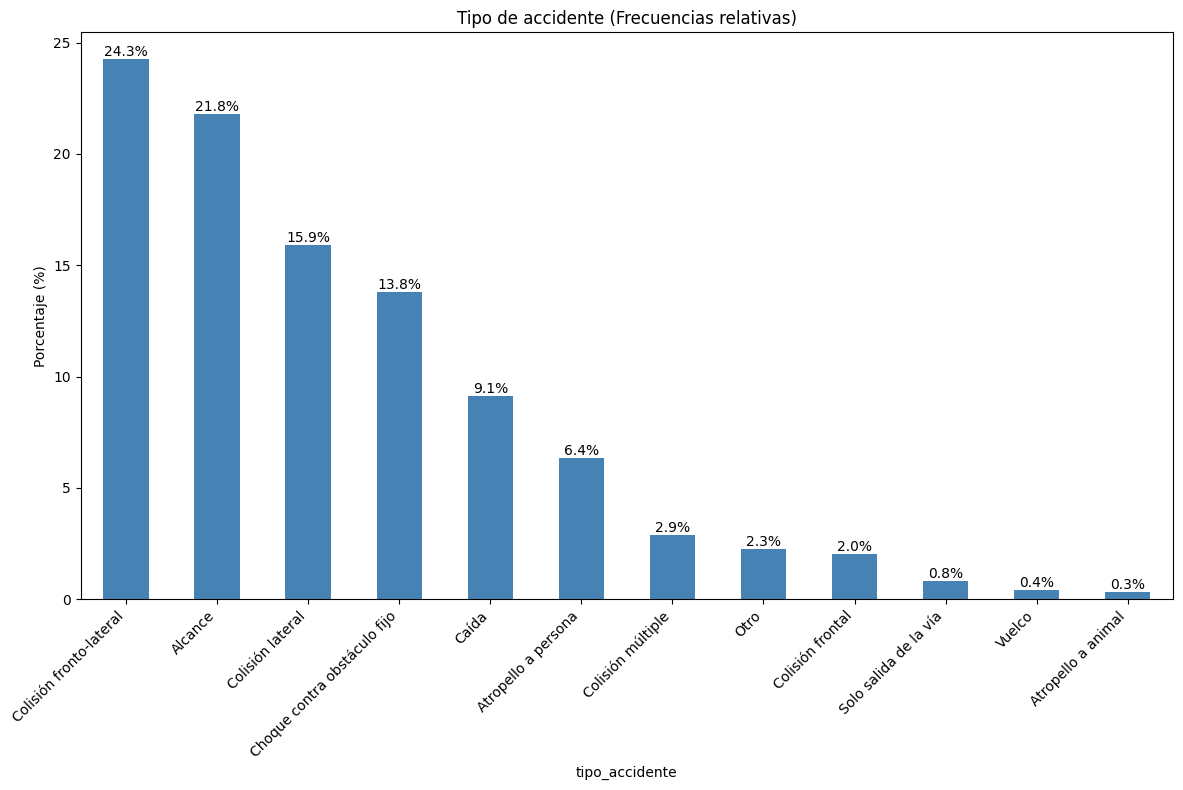

In [28]:
import matplotlib.pyplot as plt

# Crear columna limpia 
df = df_accidentes_2024_copy_univariante.copy()
df["tipo_accidente_limpio"] = df["tipo_accidente"].str.strip().str.lower()

# Filtrar "no consta"
df_filtrado = df[df["tipo_accidente_limpio"] != "no consta"]

# Calcular frecuencias absolutas 
abs_freq = (
    df_filtrado
    .groupby("tipo_accidente")["num_expediente"]
    .nunique()
    .sort_values(ascending=False)
)

# Calcular frecuencias relativas 
rel_freq = abs_freq / abs_freq.sum() * 100

# Eliminar categorías con valor 0 (por si acaso) 
rel_freq = rel_freq[rel_freq > 0]

#  Crear gráfico 
plt.figure(figsize=(12, 8))
rel_freq.plot(kind="bar", color="steelblue")

plt.title("Tipo de accidente (Frecuencias relativas)")
plt.ylabel("Porcentaje (%)")
plt.xticks(rotation=45, ha="right")

# Etiquetas numéricas encima de cada barra
for i, v in enumerate(rel_freq):
    plt.text(i, v, f"{v:.1f}%", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()


Los datos muestran una clara concentración en ciertos tipos de siniestros:

- Colisión fronto-lateral: 5019 casos (24.3%)

- Alcance: 4514 casos (21.8%)

- Colisión lateral: 3297 casos (15.9%)

- Choque contra obstáculo fijo: 2858 casos (13.8%)

- Caída: 1889 casos (9.1%)

- Atropello a persona: 1316 casos (6.4%)

- Otros tipos como colisión múltiple, frontal, vuelco o atropello a animal tienen frecuencias mucho menores (≤ 3%).

El tipo más frecuente es la colisión fronto-lateral, representando casi una cuarta parte de todos los accidentes registrados. Le siguen el alcance y la colisión lateral, que juntas suman más del 60% de los casos.

#### Analisis Univariante por tipo de persona implicada en los accidente y por vehiculos

- Conductores vs pasajeros vs peatones
- Vehículos más involucrados
- Distribución por edad en los accidentes, ¿Qué grupos de edad aparecen más?
- Para un analisis demografico general ,¿Qué edades están más presentes en los accidentes, independientemente del rol?
- Distribución por sexo, ¿Hay diferencias entre hombres y mujeres?
- Accidentes de motos vs coches



C:\Users\aquin\AppData\Local\Temp\ipykernel_17496\4010322784.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(abs_freq.index, rotation=45, ha="right")
C:\Users\aquin\AppData\Local\Temp\ipykernel_17496\4010322784.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(rel_freq.index, rotation=45, ha="right")


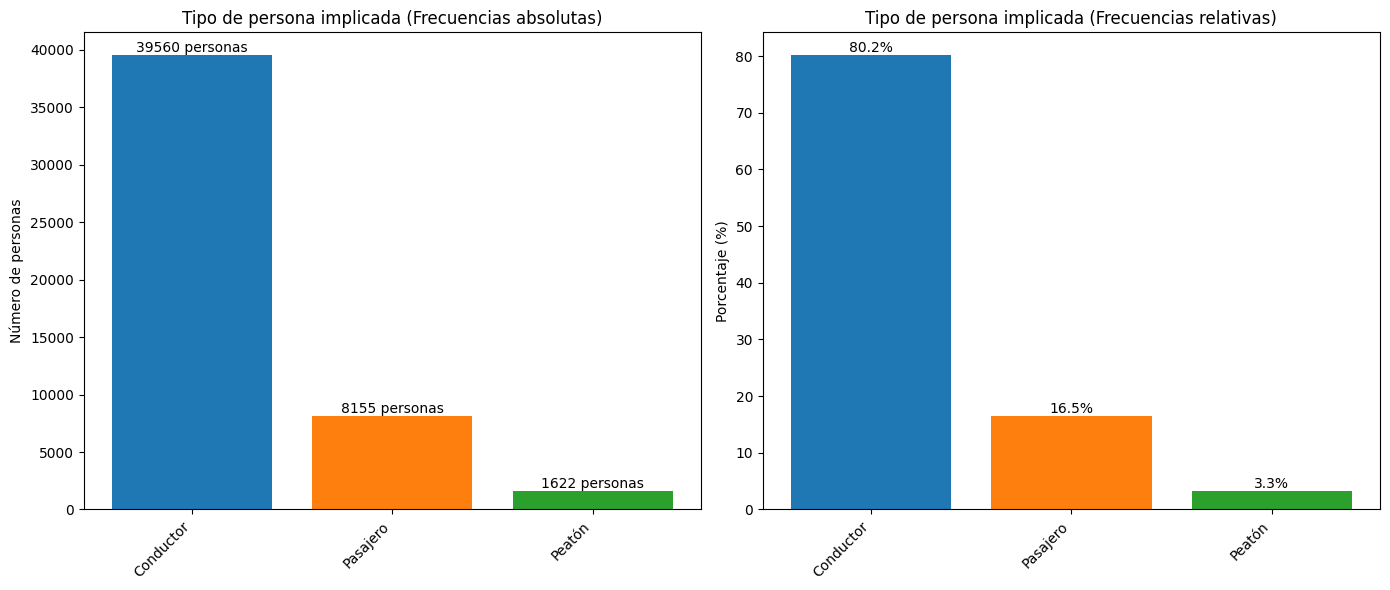

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Frecuencias absolutas (personas)
abs_freq = (
    df_accidentes_2024_copy_univariante["tipo_persona"]
    .value_counts()
)

# Frecuencias relativas (%)
rel_freq = abs_freq / abs_freq.sum() * 100

# Paleta de colores consistente
colors = sns.color_palette("tab10", n_colors=len(abs_freq))

# Crear figura con dos subplots horizontales
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: Absolutas (izquierda) 
axes[0].bar(abs_freq.index, abs_freq.values, color=colors)
axes[0].set_title("Tipo de persona implicada (Frecuencias absolutas)")
axes[0].set_ylabel("Número de personas")

# Rotación y alineación de etiquetas del eje X
axes[0].set_xticklabels(abs_freq.index, rotation=45, ha="right")

# Etiquetas encima de cada barra
for i, v in enumerate(abs_freq):
    axes[0].text(i, v, f"{v} personas", ha="center", va="bottom", fontsize=10)

# Gráfico 2: Relativas (derecha)
axes[1].bar(rel_freq.index, rel_freq.values, color=colors)
axes[1].set_title("Tipo de persona implicada (Frecuencias relativas)")
axes[1].set_ylabel("Porcentaje (%)")

# Rotación y alineación de etiquetas del eje X
axes[1].set_xticklabels(rel_freq.index, rotation=45, ha="right")

# Etiquetas encima de cada barra
for i, v in enumerate(rel_freq):
    axes[1].text(i, v, f"{v:.1f}%", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()


Datos observados:
- Conductores: 39.560 personas (80.2%)

- Pasajeros: 8.155 personas (16.5%)

- Peatones: 1.622 personas (3.3%)

Conclusiones clave
1. Los conductores son el grupo más implicado
Más del 80% de las personas involucradas en accidentes son conductores, lo que refleja que la mayoría de siniestros ocurren durante la conducción activa, y no como acompañantes ni como peatones.

2. Los pasajeros tienen una implicación secundaria
Aunque representan el 16.5%, los pasajeros suelen estar expuestos a los efectos del accidente sin tener control sobre la situación. Esto refuerza la importancia de medidas de seguridad pasiva, como cinturones, airbags y diseño interior.

3. Los peatones son minoría, pero críticos
Solo el 3.3% de las personas implicadas son peatones, pero su vulnerabilidad es mucho mayor. Aunque menos frecuentes, los accidentes con peatones suelen tener mayor gravedad, lo que exige atención especial en zonas urbanas, pasos de cebra y entornos escolares.

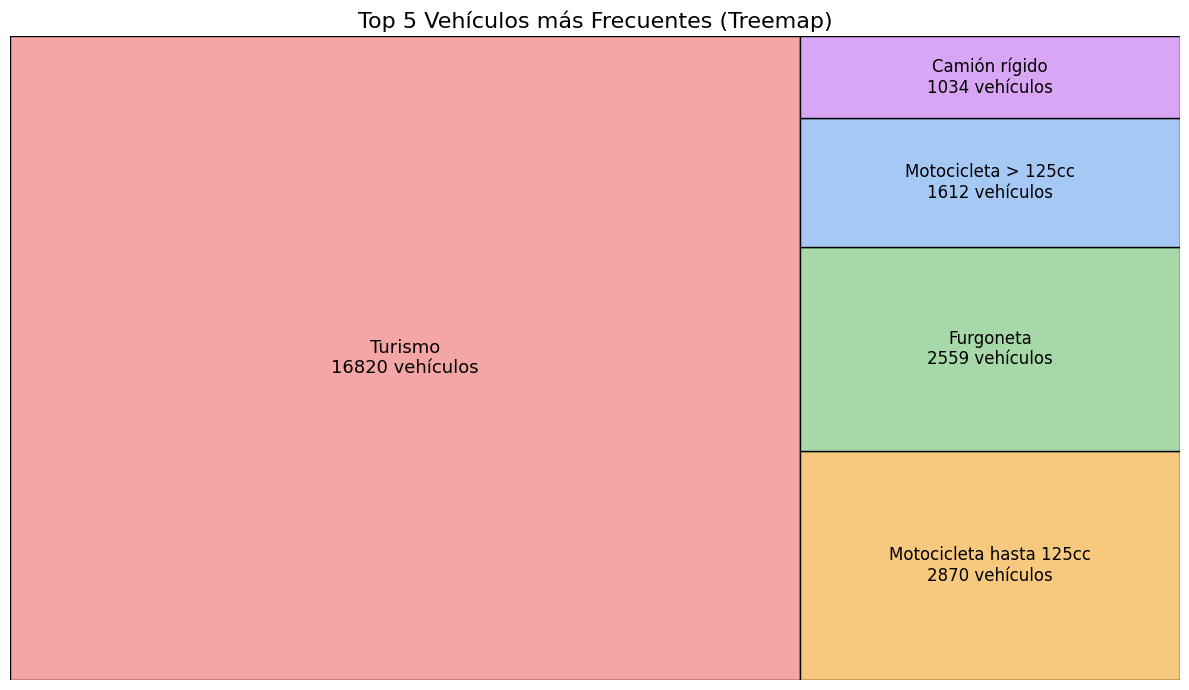

In [30]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# 1. Filtrar solo conductores 
df_conductores = df_accidentes_2024_copy_univariante[
    df_accidentes_2024_copy_univariante["tipo_persona"].str.strip().str.lower() == "conductor"
]

# 2. Evitar duplicados reales 
df_vehiculos = df_conductores[["num_expediente", "tipo_vehiculo"]].drop_duplicates()

# 3. Contar los 5 vehículos más frecuentes 
vehiculo_freq = (
    df_vehiculos["tipo_vehiculo"]
    .str.strip()
    .value_counts()
    .head(5)
)

labels = vehiculo_freq.index.tolist()
sizes = vehiculo_freq.values.tolist()

# 4. Normalizar tamaños 
total = sum(sizes)
norm_sizes = [s / total for s in sizes]

# 5. Crear treemap estilo “bloque grande + 4 apilados”
fig, ax = plt.subplots(figsize=(12, 7))

# Área total
W, H = 100, 100

# Bloque principal (izquierda)
main_width = W * norm_sizes[0]          # proporcional
main_height = H

# Dibujar bloque principal
ax.add_patch(Rectangle((0, 0), main_width, main_height,
                       facecolor="#f4a6a6", edgecolor="black"))
ax.text(main_width/2, main_height/2,
        f"{labels[0]}\n{sizes[0]} vehículos",
        ha="center", va="center", fontsize=13)

# Bloques apilados (derecha)
x_right = main_width
y = 0
right_width = W - main_width

# Normalizar tamaños de los 4 restantes dentro del área derecha
rest_sizes = norm_sizes[1:]
rest_total = sum(rest_sizes)
rest_norm = [s / rest_total for s in rest_sizes]

colores = ["#f7c97f", "#a6d8a8", "#a6c8f4", "#d8a6f4"]

for i in range(4):
    block_height = H * rest_norm[i]     # proporcional
    ax.add_patch(Rectangle((x_right, y), right_width, block_height,
                           facecolor=colores[i], edgecolor="black"))
    ax.text(x_right + right_width/2, y + block_height/2,
            f"{labels[i+1]}\n{sizes[i+1]} vehículos",
            ha="center", va="center", fontsize=12)
    y += block_height

# ------------------ 6. Estética final ------------------
ax.set_xlim(0, W)
ax.set_ylim(0, H)
ax.axis("off")
plt.title("Top 5 Vehículos más Frecuentes (Treemap)", fontsize=16)
plt.tight_layout()
plt.show()


Datos observados:
- Turismo (vehículo particular): 16.820 casos

- Motocicleta hasta 125cc: 2.870 casos

- Furgoneta: 2.559 casos

- Motocicleta > 125cc: 1.612 casos

- Camión rígido: 1.034 casos

Conclusiones clave
1. El turismo domina claramente la siniestralidad
Más del 70% de los vehículos implicados son turismos, lo que refleja que la movilidad urbana y particular es el principal escenario de riesgo. Esto es coherente con el perfil de ciudad densa y tráfico diario.

2. Las motocicletas tienen una presencia significativa
Sumando las dos categorías de motocicletas (hasta y más de 125cc), se superan los 4.400 casos, lo que representa una proporción considerable. Esto indica que, aunque menos numerosas que los turismos, las motos están altamente expuestas y deben ser consideradas en políticas de seguridad vial.

3. Furgonetas y camiones también están presentes
Aunque en menor medida, los vehículos de transporte como furgonetas y camiones rígidos aparecen en el top 5. Esto sugiere que la logística urbana también contribuye a la siniestralidad, especialmente en zonas de carga, reparto o maniobras.

- Para seguridad vial es mas util tener solo por conductor 

In [ ]:
import matplotlib.pyplot as plt

# 1. Filtrar solo conductores 
df_conductores = df_accidentes_2024_copy_univariante[
    df_accidentes_2024_copy_univariante["tipo_persona"].str.strip().str.lower() == "conductor"
]

# 2. Eliminar categoría "Desconocido" 
df_conductores = df_conductores[
    df_conductores["rango_edad"].str.strip().str.lower() != "desconocido"
]

# 3. Orden correcto de rangos de edad 
orden_edad = [
    "Menor de 5 años",
    "De 6 a 9 años",
    "De 10 a 14 años",
    "De 15 a 17 años",
    "De 18 a 20 años",
    "De 21 a 24 años",
    "De 25 a 29 años",
    "De 30 a 34 años",
    "De 35 a 39 años",
    "De 40 a 44 años",
    "De 45 a 49 años",
    "De 50 a 54 años",
    "De 55 a 59 años",
    "De 60 a 64 años",
    "De 65 a 69 años",
    "De 70 a 74 años",
    "Más de 74 años"
]

df_conductores["rango_edad"] = df_conductores["rango_edad"].str.strip()
df_conductores["rango_edad"] = df_conductores["rango_edad"].astype("category")
df_conductores["rango_edad"] = df_conductores["rango_edad"].cat.set_categories(
    orden_edad, ordered=True
)

# 4. Frecuencias
edad_abs = df_conductores["rango_edad"].value_counts().sort_index()
edad_rel = edad_abs / edad_abs.sum() * 100

# 5. Gráfico de frecuencias absolutas 
plt.figure(figsize=(12, 6))
edad_abs.plot(kind="bar", color="steelblue")

plt.title("Rango de edad (solo conductores) – Frecuencias absolutas")
plt.ylabel("Número de conductores")
plt.xticks(rotation=45, ha="right")

for i, v in enumerate(edad_abs):
    if v > 0:
        plt.text(i, v, f"{v}", ha="center", va="bottom")

plt.tight_layout()
plt.show()

# 6. Gráfico de frecuencias relativas 
plt.figure(figsize=(12, 6))
edad_rel.plot(kind="bar", color="darkorange")

plt.title("Rango de edad (solo conductores) – Frecuencias relativas")
plt.ylabel("Porcentaje (%)")
plt.xticks(rotation=45, ha="right")

for i, v in enumerate(edad_rel):
    if v > 0:
        plt.text(i, v, f"{v:.3f}%", ha="center", va="bottom")

plt.tight_layout()
plt.show()


Datos clave observados:
- Frecuencias absolutas (número de conductores implicados):
Máxima concentración entre 40 y 49 años (más de 4.000 casos por grupo).

- Alta participación también entre 30 y 39 años.

- Descenso progresivo a partir de los 50 años.

- Presencia marginal en menores de 18 años, aunque no nula.

Frecuencias relativas (porcentaje sobre el total):
- El grupo más representado es 40–44 años (12.7%), seguido por 35–39 años (11.7%).

- Los grupos entre 30 y 49 años concentran más del 45% de los conductores implicados.

- Los menores de edad (≤17 años) representan menos del 3.2% del total.

- Los mayores de 65 años tienen presencia reducida pero no despreciable.

Conclusiones clave
1. Edad media de riesgo: entre 30 y 49 años
La mayoría de conductores implicados en accidentes se sitúan entre los 30 y 49 años, lo que coincide con la franja de mayor actividad laboral y movilidad diaria. Esto sugiere que el riesgo está asociado al volumen de exposición, no necesariamente a la imprudencia.

2. Baja pero significativa presencia de menores
Aunque los menores de edad representan un porcentaje muy bajo, su presencia como conductores en los datos es preocupante. Como ya has detectado, algunos casos son incoherencias normativas (turismos conducidos por menores), mientras que otros (VMU, bicicletas) son legales pero vulnerables.

3. Descenso progresivo en mayores de 50 años
A partir de los 50 años, la implicación en accidentes disminuye, aunque sigue siendo relevante. Esto puede deberse a menor exposición, mayor experiencia, o cambios en hábitos de movilidad.

4. Importancia de validar edad y tipo de vehículo
La presencia de menores en vehículos no autorizados refuerza la necesidad de validar la coherencia entre edad, tipo de vehículo y rol en el accidente. Este cruce es esencial para evitar errores de interpretación y para diseñar políticas de prevención ajustadas a la realidad.

In [ ]:
df_conductores_6_9 = df_accidentes_2024_copy_univariante[
    (df_accidentes_2024_copy_univariante["tipo_persona"].str.strip().str.lower() == "conductor") &
    (df_accidentes_2024_copy_univariante["rango_edad"].str.strip() == "De 6 a 9 años")
]

df_conductores_6_9


- En este caso conducia un patinete electrico que no tiene edad minima.

1. Caso de 6 a 9 años
- Registro detectado: Un conductor de VMU eléctrico.

- Interpretación: No hay incoherencia legal. Los Vehículos de Movilidad Urbana (VMU) como patinetes eléctricos no requieren edad mínima legal para circular, aunque sí pueden estar regulados por ordenanzas municipales.

- Conclusión: Este caso es coherente, aunque merece atención si se quiere evaluar la exposición de menores a accidentes.

In [ ]:
vehiculos_ilegales = [
    "Turismo", "Motocicleta hasta 125cc", "Motocicleta > 125cc",
    "Furgoneta", "Camión rígido", "Autobús", "Autobús articulado",
    "Autobus EMT", "Tractocamión", "Vehículo articulado",
    "Maquinaria de obras", "Autocaravana", "Cuadriciclo no ligero",
    "Moto de tres ruedas > 125cc", "Moto de tres ruedas hasta 125cc",
    "Ciclomotor", "Ciclomotor de dos ruedas L1e-B",
    "Ciclomotor de tres ruedas", "Ciclo de motor L1e-A",
    "Remolque", "Semiremolque", "Otros vehículos con motor"
]

df_10_14_ilegales = df_accidentes_2024_copy_univariante[
    (df_accidentes_2024_copy_univariante["tipo_persona"].str.lower().str.strip() == "conductor") &
    (df_accidentes_2024_copy_univariante["rango_edad"].str.strip() == "De 10 a 14 años") &
    (df_accidentes_2024_copy_univariante["tipo_vehiculo"].isin(vehiculos_ilegales))
]

df_10_14_ilegales



- Registros detectados: Dos conductores de turismo en ese rango de edad.

- Vehículo implicado: Turismo (coche).

- Edad mínima legal para conducir turismo: 18 años.

- Conclusión: Estos casos son incoherencias graves desde el punto de vista normativo. Es imposible legalmente que una persona de 10 a 14 años conduzca un turismo.
- Posibles causas:

- Error de registro en el campo tipo_persona (era pasajero o peatón).

- Error en rango_edad.

- Error en tipo_vehiculo.

- Esto puede ser error del policia al apuntar el incidente o una ilegalidad por parte del menor 

| Vehículo                                           | Edad mínima legal                                      |
|----------------------------------------------------|--------------------------------------------------------|
| Turismo (coche)                                    | 18 años                                                |
| Motocicleta > 125cc                                | 18 años                                                |
| Motocicleta hasta 125cc                            | 16 años                                                |
| Ciclomotor (L1e, L2e)                              | 15 años                                                |
| Cuadriciclo ligero                                 | 15 años                                                |
| Cuadriciclo no ligero                              | 18 años                                                |
| Camión, furgoneta grande, autobús, articulados     | 18–21 años                                             |
| Bicicleta, patinete, VMU eléctrico                 | Sin edad mínima (no son vehículos a motor)            |
| Tractocamión, maquinaria de obras                  | 18 años                                                |
| Remolques / semirremolques                         | 18 años                                                |


In [ ]:
# 1. Lista de vehículos que NO pueden ser conducidos legalmente entre 15 y 17 años
vehiculos_ilegales_15_17 = [
    "Turismo",
    "Motocicleta > 125cc",
    "Furgoneta",
    "Camión rígido",
    "Autobús",
    "Autobús articulado",
    "Autobus EMT",
    "Tractocamión",
    "Vehículo articulado",
    "Maquinaria de obras",
    "Autocaravana",
    "Cuadriciclo no ligero",
    "Moto de tres ruedas > 125cc",
    "Moto de tres ruedas hasta 125cc",
    "Ciclomotor de tres ruedas",
    "Ciclomotor de dos ruedas L1e-B",
    "Ciclo de motor L1e-A",
    "Remolque",
    "Semiremolque",
    "Otros vehículos con motor"
]

# 2. Filtrar conductores de 15 a 17 años que aparecen con vehículos ilegales
df_15_17_ilegales = df_accidentes_2024_copy_univariante[
    (df_accidentes_2024_copy_univariante["tipo_persona"].str.lower().str.strip() == "conductor") &
    (df_accidentes_2024_copy_univariante["rango_edad"].str.strip() == "De 15 a 17 años") &
    (df_accidentes_2024_copy_univariante["tipo_vehiculo"].isin(vehiculos_ilegales_15_17))
]

# 3. Mostrar resultado
df_15_17_ilegales


- Registros detectados: 6 conductores en este rango de edad.

- Vehículos implicados:

- Turismo (4 casos)

- Furgoneta (1 caso)

- Otros vehículos con motor (1 caso)

- Edad mínima legal para estos vehículos: 18 años.

- Conclusión: Todos estos casos son incoherencias normativas.
A los 15–17 años solo se puede conducir:

- Ciclomotor

- Motocicleta hasta 125cc

- Cuadriciclo ligero

- VMU / bicicleta / ciclo

- Esto puede ser error del policia al apuntar el incidente o una ilegalidad por parte del menor 

“¿Qué edades están más presentes en los accidentes, independientemente del rol?” Para un analisis demografico general 

In [ ]:
import matplotlib.pyplot as plt

# 1. Dataset completo (todos los implicados) 
df_todos = df_accidentes_2024_copy_univariante.copy()

# 2. Eliminar categoría "Desconocido" 
df_todos = df_todos[
    df_todos["rango_edad"].str.strip().str.lower() != "desconocido"
]

# 3. Orden correcto de rangos de edad 
orden_edad = [
    "Menor de 5 años",
    "De 6 a 9 años",
    "De 10 a 14 años",
    "De 15 a 17 años",
    "De 18 a 20 años",
    "De 21 a 24 años",
    "De 25 a 29 años",
    "De 30 a 34 años",
    "De 35 a 39 años",
    "De 40 a 44 años",
    "De 45 a 49 años",
    "De 50 a 54 años",
    "De 55 a 59 años",
    "De 60 a 64 años",
    "De 65 a 69 años",
    "De 70 a 74 años",
    "Más de 74 años"
]

df_todos["rango_edad"] = df_todos["rango_edad"].str.strip()
df_todos["rango_edad"] = df_todos["rango_edad"].astype("category")
df_todos["rango_edad"] = df_todos["rango_edad"].cat.set_categories(
    orden_edad, ordered=True
)

# 4. Frecuencias absolutas 
edad_abs_all = df_todos["rango_edad"].value_counts().sort_index()

# 5. Frecuencias relativas (%) 
edad_rel_all = edad_abs_all / edad_abs_all.sum() * 100

# 6. Gráfico de frecuencias absolutas 
plt.figure(figsize=(12, 6))
edad_abs_all.plot(kind="bar", color="seagreen")

plt.title("Rango de edad (todos los implicados) – Frecuencias absolutas")
plt.ylabel("Número de personas")
plt.xticks(rotation=45, ha="right")

for i, v in enumerate(edad_abs_all):
    if v > 0:
        plt.text(i, v, f"{v}", ha="center", va="bottom")

plt.tight_layout()
plt.show()

# 7. Gráfico de frecuencias relativas 
plt.figure(figsize=(12, 6))
edad_rel_all.plot(kind="bar", color="purple")

plt.title("Rango de edad (todos los implicados) – Frecuencias relativas")
plt.ylabel("Porcentaje (%)")
plt.xticks(rotation=45, ha="right")

for i, v in enumerate(edad_rel_all):
    if v > 0:
        plt.text(i, v, f"{v:.1f}%", ha="center", va="bottom")

plt.tight_layout()
plt.show()


Datos clave observados:
Frecuencias absolutas:
Los grupos más numerosos son:

- 30–34 años: 4.828 personas

- 25–29 años: 4.816 personas

- 45–49 años: 5.002 personas

- 40–44 años: 4.697 personas

- 35–39 años: 4.585 personas

- 50–54 años: 4.538 personas
Frecuencias relativas:
Los porcentajes más altos están en:

- 45–49 años: 11.4%

- 30–34 años: 11.0%

- 25–29 años: 10.9%

- 40–44 años: 10.7%

- 35–39 años: 10.4%

- 50–54 años: 10.3%

Conclusiones clave
1. Edad de mayor implicación: 25 a 54 años
Más del 60% de las personas implicadas en accidentes se concentran entre los 25 y 54 años, lo que refleja que esta franja es la de mayor exposición vial. Coincide con los años de mayor actividad laboral, movilidad urbana y uso intensivo de vehículos.

2. Alta implicación en la treintena y cuarentena
Los grupos entre 30 y 49 años son los más representados tanto en número absoluto como en porcentaje. Esto sugiere que el perfil típico de persona implicada en accidentes es un adulto en edad laboral activa, probablemente con desplazamientos frecuentes.

3. Presencia significativa de mayores de 60
Aunque en menor proporción, los mayores de 60 años siguen apareciendo en los datos. Esto indica que, aunque su movilidad es menor, no están exentos de riesgo, especialmente como peatones o pasajeros.

4. Baja pero no nula presencia de menores
Los menores de 18 años representan alrededor del 3.8% del total. Aunque su implicación es baja, es importante considerar su vulnerabilidad, especialmente como pasajeros o peatones.

 Distribución por sexo, ¿Hay diferencias entre hombres y mujeres?

In [ ]:
import matplotlib.pyplot as plt

# 1. Filtrar solo conductores 
df_conductores = df_accidentes_2024_copy_univariante[
    df_accidentes_2024_copy_univariante["tipo_persona"].str.strip().str.lower() == "conductor"
]

# 2. Eliminar "Desconocido"
df_conductores = df_conductores[
    df_conductores["sexo"].str.strip().str.lower() != "desconocido"
]

# 3. Orden correcto 
orden_sexo = ["Hombre", "Mujer"]

df_conductores["sexo"] = df_conductores["sexo"].str.strip()
df_conductores["sexo"] = df_conductores["sexo"].astype("category")
df_conductores["sexo"] = df_conductores["sexo"].cat.set_categories(
    orden_sexo, ordered=True
)

# 4. Frecuencias 
sexo_abs = df_conductores["sexo"].value_counts().sort_index()
sexo_rel = sexo_abs / sexo_abs.sum() * 100

# 5. Gráfico de frecuencias absolutas 
plt.figure(figsize=(8, 5))
sexo_abs.plot(kind="bar", color=["steelblue", "darkorange"])

plt.title("Sexo (solo conductores) – Frecuencias absolutas")
plt.ylabel("Número de conductores")
plt.xticks(rotation=0)

for i, v in enumerate(sexo_abs):
    plt.text(i, v, f"{v}", ha="center", va="bottom")

plt.tight_layout()
plt.show()

# 6. Gráfico de frecuencias relativas
plt.figure(figsize=(8, 5))
sexo_rel.plot(kind="bar", color=["steelblue", "darkorange"])

plt.title("Sexo (solo conductores) – Frecuencias relativas")
plt.ylabel("Porcentaje (%)")
plt.xticks(rotation=0)

for i, v in enumerate(sexo_rel):
    plt.text(i, v, f"{v:.1f}%", ha="center", va="bottom")

plt.tight_layout()
plt.show()


Conclusiones clave:
1. Predominio masculino entre conductores implicados
Los hombres representan tres de cada cuatro conductores implicados en accidentes. Esta diferencia es muy marcada tanto en número como en proporción.

2. Posible relación con hábitos de conducción
Este predominio puede deberse a que los hombres, en promedio, conducen más kilómetros, tienen mayor presencia en vehículos profesionales (furgonetas, camiones, motos), y están más expuestos a la circulación diaria.

3. No implica mayor imprudencia, sino mayor exposición
La diferencia no debe interpretarse como una cuestión de imprudencia, sino como una mayor exposición al riesgo por volumen de conducción. Para evaluar comportamientos, habría que cruzar con variables como tipo de accidente, alcohol/drogas, velocidad, etc.

4. Importancia de segmentar por tipo de vehículo
Sería útil analizar si esta diferencia se mantiene en todos los tipos de vehículo o si hay segmentos donde las mujeres están más representadas (por ejemplo, turismos frente a motocicletas o furgonetas).

In [ ]:
import matplotlib.pyplot as plt

# 1. Dataset completo 
df_todos = df_accidentes_2024_copy_univariante.copy()

# 2. Eliminar "Desconocido" 
df_todos = df_todos[
    df_todos["sexo"].str.strip().str.lower() != "desconocido"
]

# 3. Orden correcto 
orden_sexo = ["Hombre", "Mujer"]

df_todos["sexo"] = df_todos["sexo"].str.strip()
df_todos["sexo"] = df_todos["sexo"].astype("category")
df_todos["sexo"] = df_todos["sexo"].cat.set_categories(
    orden_sexo, ordered=True
)

# 4. Frecuencias 
sexo_abs_all = df_todos["sexo"].value_counts().sort_index()
sexo_rel_all = sexo_abs_all / sexo_abs_all.sum() * 100

# 5. Gráfico de frecuencias absolutas 
plt.figure(figsize=(8, 5))
sexo_abs_all.plot(kind="bar", color=["seagreen", "purple"])

plt.title("Sexo (todos los implicados) – Frecuencias absolutas")
plt.ylabel("Número de personas")
plt.xticks(rotation=0)

for i, v in enumerate(sexo_abs_all):
    plt.text(i, v, f"{v}", ha="center", va="bottom")

plt.tight_layout()
plt.show()

# 6. Gráfico de frecuencias relativas
plt.figure(figsize=(8, 5))
sexo_rel_all.plot(kind="bar", color=["seagreen", "purple"])

plt.title("Sexo (todos los implicados) – Frecuencias relativas")
plt.ylabel("Porcentaje (%)")
plt.xticks(rotation=0)

for i, v in enumerate(sexo_rel_all):
    plt.text(i, v, f"{v:.1f}%", ha="center", va="bottom")

plt.tight_layout()
plt.show()

Conclusiones clave
1. Predominio masculino, pero menos marcado que entre conductores
Aunque los hombres siguen siendo mayoría entre los implicados, su proporción baja del 74.7% (conductores) al 67.6% (todos los implicados). Esto indica que las mujeres tienen mayor presencia como pasajeras o peatones que como conductoras.

2. Las mujeres están más representadas fuera del rol de conducción
La diferencia entre el 25.3% de conductoras y el 32.4% de implicadas totales sugiere que las mujeres participan más en accidentes como acompañantes o peatones, lo que puede tener implicaciones en términos de vulnerabilidad y diseño de medidas de protección.

3. Importancia de segmentar por rol
Este análisis demuestra que el rol en el accidente modifica la distribución por sexo. Para entender mejor los patrones de riesgo, es clave cruzar sexo con tipo de persona (tipo_persona) y tipo de vehículo.

#### Analisis de Lesividad (muy importante)

- Severidad de los accidentes (Sin asistencia sanitaria, leve, grave, fallecido)


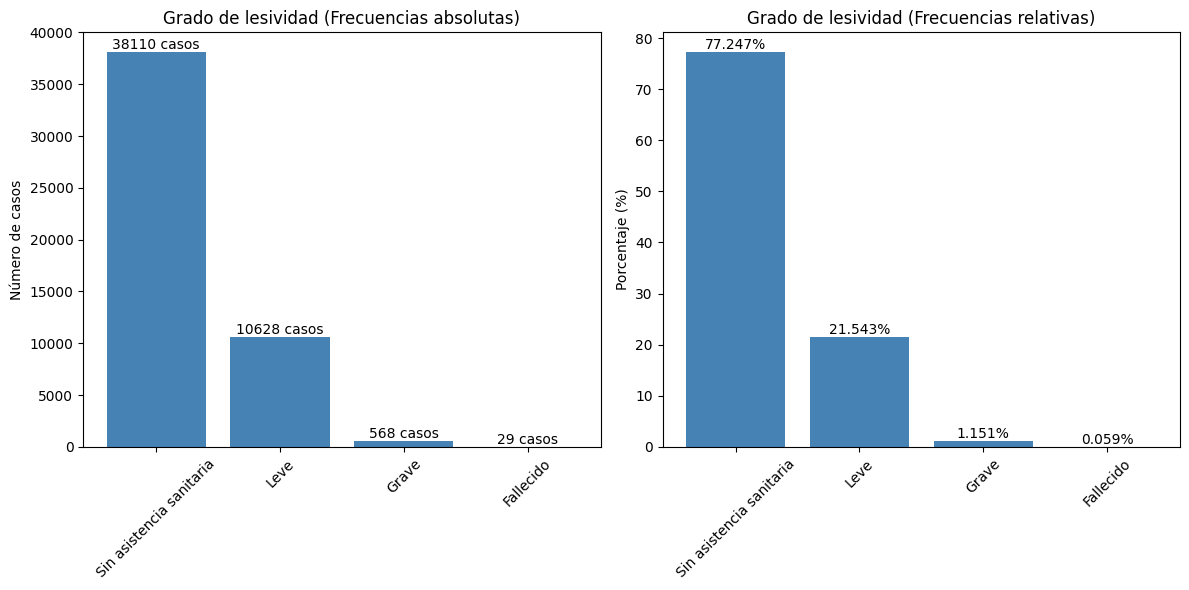

In [32]:
import matplotlib.pyplot as plt
import unicodedata
import re

# Función de limpieza profunda 
def limpiar_texto(x):
    x = str(x)
    x = unicodedata.normalize("NFKC", x)       # normaliza caracteres raros
    x = x.replace("\u00A0", " ")               # elimina NO-BREAK SPACE
    x = re.sub(r"\s+", " ", x)                 # colapsa espacios múltiples
    return x.strip().lower()

# Normalizar columna 
lesividad_norm = df_accidentes_2024_copy_univariante["grado_lesividad"].apply(limpiar_texto)

# Excluir variantes de "no consta" y "se desconoce" 
valores_excluir = ["no consta", "se desconoce"]
lesividad_filtrado = lesividad_norm[~lesividad_norm.isin(valores_excluir)]

# Recontar sobre columna limpia 
abs_freq = lesividad_filtrado.value_counts()
rel_freq = abs_freq / abs_freq.sum() * 100

# Eliminar categorías con frecuencia 0 
abs_freq = abs_freq[abs_freq > 0]
rel_freq = rel_freq[rel_freq > 0]

# Mapear nombres legibles 
etiquetas_legibles = {
    "sin asistencia sanitaria": "Sin asistencia sanitaria",
    "leve": "Leve",
    "grave": "Grave",
    "fallecido": "Fallecido"
}

abs_freq.index = [etiquetas_legibles.get(cat, cat.title()) for cat in abs_freq.index]
rel_freq.index = abs_freq.index  # sincronizar índices

# Crear figura 
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
color = "steelblue"

# Gráfico 1: Absolutas 
axes[0].bar(abs_freq.index, abs_freq.values, color=color)
axes[0].set_title("Grado de lesividad (Frecuencias absolutas)")
axes[0].set_ylabel("Número de casos")
axes[0].tick_params(axis="x", rotation=45)

for i, v in enumerate(abs_freq):
    axes[0].text(i, v, f"{v} casos", ha="center", va="bottom", fontsize=10)

# Gráfico 2: Relativas 
axes[1].bar(rel_freq.index, rel_freq.values, color=color)
axes[1].set_title("Grado de lesividad (Frecuencias relativas)")
axes[1].set_ylabel("Porcentaje (%)")
axes[1].tick_params(axis="x", rotation=45)

for i, v in enumerate(rel_freq):
    axes[1].text(i, v, f"{v:.3f}%", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()




Conclusiones clave
1. La mayoría de los accidentes no requieren atención médica
Más del 77% de los implicados no recibió ningún tipo de asistencia sanitaria. Esto sugiere que la mayoría de los accidentes registrados fueron leves o sin consecuencias físicas aparentes, aunque no necesariamente sin impacto psicológico o material.

2. Solo una quinta parte presenta lesiones leves
El 21.5% de los casos recibió atención médica leve (sin ingreso). Esto representa el segmento clínicamente relevante para servicios de urgencias, pero no implica hospitalización.

3. Lesiones graves y fallecimientos son excepcionales
Solo el 1.15% de los casos fueron graves, y 0.06% resultaron en fallecimiento. Aunque numéricamente bajos, estos casos son críticos para la planificación de medidas de prevención, especialmente en zonas o tipos de accidente donde se concentran.

4. Importancia de segmentar por tipo de accidente y vehículo
Este análisis global debe complementarse con cruces bivariantes (como ya estás haciendo) para detectar qué tipos de accidente o vehículos están asociados a mayor lesividad. Por ejemplo, motocicletas y atropellos suelen tener mayor proporción de lesiones graves.

#### Analisis Univariante de Alcohol
- Accidentes de conductores con alcohol


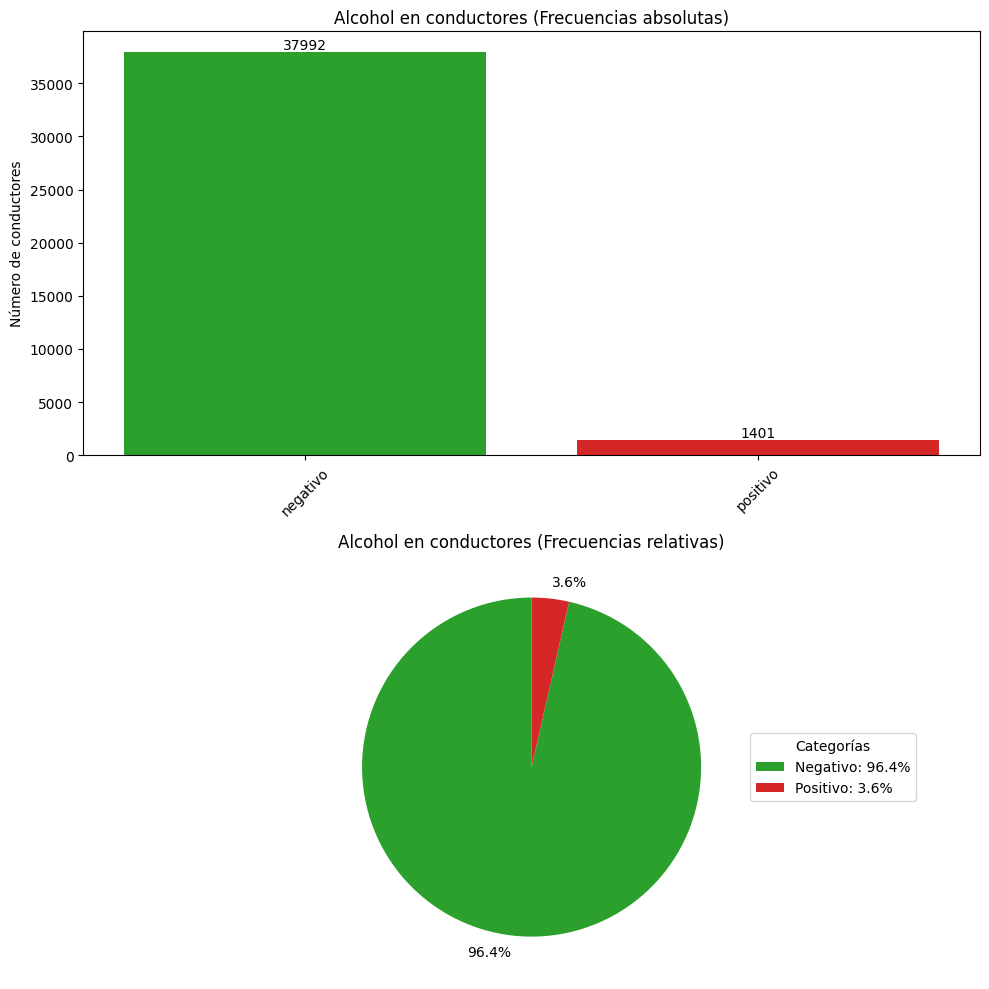

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Filtrar solo conductores 
df_conductores = df_accidentes_2024_copy_univariante[
    df_accidentes_2024_copy_univariante["tipo_persona"].str.lower() == "conductor"
]

# Normalizar columna antes de contar 
alcohol_col = (
    df_conductores["positiva_alcohol"]
    .astype(str)
    .str.strip()
    .str.lower()
)

# Excluir "no consta" 
alcohol_filtrado = alcohol_col[alcohol_col != "no consta"]

# Recontar sobre columna ya limpia 
abs_freq = alcohol_filtrado.value_counts()
rel_freq = abs_freq / abs_freq.sum() * 100

#Paleta de colores personalizada
color_map = {
    "positivo": "#d62728",      # rojo
    "negativo": "#2ca02c",      # verde
}

colors = [color_map.get(cat, "#999999") for cat in abs_freq.index]

# Crear figura 
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

#1. Gráfico de barras (absolutos)
ax[0].bar(abs_freq.index, abs_freq.values, color=colors)
ax[0].set_title("Alcohol en conductores (Frecuencias absolutas)")
ax[0].set_ylabel("Número de conductores")
ax[0].tick_params(axis="x", rotation=45)

for i, v in enumerate(abs_freq):
    ax[0].text(i, v, f"{v}", ha="center", va="bottom", fontsize=10)

#2. Gráfico de tarta (porcentajes bien posicionados)
# Pie chart sin etiquetas internas
wedges, _ = ax[1].pie(
    rel_freq,
    labels=None,
    autopct=None,
    startangle=90,
    colors=colors,
    radius=1
)

ax[1].set_title("Alcohol en conductores (Frecuencias relativas)")

# Añadir etiquetas externas alineadas con cada segmento
for i, (wedge, pct) in enumerate(zip(wedges, rel_freq.values)):
    angle = (wedge.theta2 + wedge.theta1) / 2
    x = np.cos(np.deg2rad(angle))
    y = np.sin(np.deg2rad(angle))
    label_x = 1.1 * x
    label_y = 1.1 * y
    ha = "left" if x > 0 else "right"
    ax[1].text(label_x, label_y, f"{pct:.1f}%", ha=ha, va="center", fontsize=10)

# Leyenda con nombre + porcentaje
legend_labels = [f"{cat.capitalize()}: {pct:.1f}%" for cat, pct in zip(rel_freq.index, rel_freq.values)]

ax[1].legend(
    wedges,
    legend_labels,
    title="Categorías",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.tight_layout()
plt.show()


1. La mayoría de conductores no presentan alcohol
El 96.4% de los conductores implicados en accidentes dieron negativo en alcohol. Esto indica que la mayoría de los accidentes no están directamente relacionados con consumo de alcohol, al menos según los registros disponibles.

2. El 3.6% positivo es bajo pero crítico
Aunque el porcentaje es bajo, 1.401 conductores dieron positivo. Esto representa un grupo altamente relevante desde el punto de vista preventivo, ya que el alcohol está asociado a mayor riesgo de lesiones graves, velocidad excesiva y pérdida de control.

3. Posible subregistro o falta de prueba
Tu código excluye "no consta", lo cual es correcto para análisis limpio. Pero es importante recordar que no todos los conductores fueron testados, y algunos casos pueden estar sin registro. Esto puede subestimar la presencia real de alcohol.

4. Puede haber varios conductores por accidente
Tu razonamiento es acertado: un mismo accidente puede involucrar más de un conductor (por ejemplo, colisión entre dos vehículos). Tu código cuenta conductores, no accidentes, lo cual es correcto si el objetivo es analizar comportamiento individual, no por expediente.

#### Analisis Univariante de meteorologico:

- ¿Que meteorologia hay en los accidentes?

In [ ]:
df_accidentes_2024.estado_meteorológico.value_counts()

In [ ]:
import matplotlib.pyplot as plt

# ------------------ Normalizar columna para filtrar ------------------
# Creamos una columna auxiliar normalizada para filtrar correctamente
df_accidentes_2024_copy_univariante["estado_meteorológico_normalizado"] = (
    df_accidentes_2024_copy_univariante["estado_meteorológico"]
    .astype(str)
    .str.strip()
    .str.lower()
)

# ------------------ Filtrar para visualización ------------------
df_meteo = df_accidentes_2024_copy_univariante[
    df_accidentes_2024_copy_univariante["estado_meteorológico_normalizado"] != "se desconoce"
]

# ------------------ Agrupar usando la columna original ------------------
# Esto conserva los nombres originales (con mayúsculas y acentos) en el gráfico
abs_freq = (
    df_meteo
    .groupby("estado_meteorológico")["num_expediente"]
    .nunique()
    .sort_values(ascending=False)
)

# ------------------ Eliminar categorías con frecuencia 0 ------------------
abs_freq = abs_freq[abs_freq > 0]
rel_freq = abs_freq / abs_freq.sum() * 100
rel_freq = rel_freq[rel_freq > 0]

# ------------------ Crear figura con dos subplots ------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
color = "steelblue"

# ------------------ Gráfico 1: Absolutas ------------------
axes[0].bar(abs_freq.index, abs_freq.values, color=color)
axes[0].set_title("Estado meteorológico (Frecuencias absolutas)")
axes[0].set_ylabel("Número de accidentes")
axes[0].tick_params(axis="x", rotation=45)
for i, v in enumerate(abs_freq):
    axes[0].text(i, v, f"{v}", ha="center", va="bottom", fontsize=10)

# ------------------ Gráfico 2: Relativas ------------------
axes[1].bar(rel_freq.index, rel_freq.values, color=color)
axes[1].set_title("Estado meteorológico (Frecuencias relativas)")
axes[1].set_ylabel("Porcentaje (%)")
axes[1].tick_params(axis="x", rotation=45)
for i, v in enumerate(rel_freq):
    axes[1].text(i, v, f"{v:.3f}%", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()



1. La mayoría de los accidentes ocurren con cielo despejado porque es, con diferencia, la condición meteorológica más frecuente en Madrid
- El 84.7% de los accidentes se registran en condiciones de cielo despejado. Esto no implica que el buen tiempo aumente el riesgo, sino que Madrid tiene un clima con predominio de días despejados, por lo que es lógico que la mayoría de los accidentes ocurran bajo esta condición simplemente por mayor exposición temporal.

- En otras palabras: si la mayor parte del año el cielo está despejado, la mayor parte de los accidentes también lo estarán, independientemente de que la meteorología influya o no en su gravedad.

2. La lluvia está presente en casi el 7% de los casos
Entre lluvia débil e intensa, se acumula cerca del 7.2% de los accidentes. Aunque no es la mayoría, sí representa un factor de riesgo relevante, especialmente para motocicletas, peatones y frenadas bruscas.

3. Condiciones extremas son anecdóticas
Accidentes con granizo o nieve son prácticamente inexistentes en el dataset (3 casos en total). Esto puede deberse a:

Baja frecuencia de estos fenómenos en Madrid.

Menor movilidad durante condiciones extremas.

Cancelación de desplazamientos por precaución.

## Analisis bivariante 

-Realizo copia del Dataframe:

In [ ]:
df_accidentes_2024_copy_bivariante=df_accidentes_2024_copy_univariante.copy()

#### Analisis bivariante Geografico: Distribución de los tipos de accidente por distrito

En este analisis vamos a ver la distribucion de tipos de accidente por distrito y a contestar a la siguiente pregunta:
- ¿El tipo de accidente depende del distrito en el que ocurre?


Para analizar cómo varían los tipos de accidente entre los distintos distritos, se emplean dos herramientas complementarias: un mapa de calor y el test Chi‑cuadrado.

El mapa de calor permite visualizar de forma inmediata dónde se concentran los distintos tipos de siniestro. Gracias a su escala de colores, es posible identificar patrones territoriales, contrastes entre distritos y tipos de accidente que destacan por su frecuencia. Esta representación facilita una lectura intuitiva del fenómeno y ayuda a detectar zonas con comportamientos diferenciados.

Sin embargo, la visualización por sí sola no basta para determinar si estas diferencias son reales o simplemente fruto del azar. Por ello se aplica el test Chi‑cuadrado, una prueba estadística que evalúa si existe una relación significativa entre las dos variables analizadas. En este caso, el test permite comprobar si la distribución de los tipos de accidente cambia de manera sistemática según el distrito. Un resultado significativo confirma que los patrones observados en el mapa de calor no son aleatorios, sino que reflejan una asociación real entre ambas variables.

En conjunto, ambas herramientas —la visualización y la prueba estadística— ofrecen una visión completa: el mapa de calor muestra cómo se distribuyen los accidentes, y el Chi‑cuadrado confirma si esas diferencias son estadísticamente relevantes.º

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Definir los tipos de accidente significativos
tipos_significativos = [
    "Colisión fronto-lateral",
    "Alcance",
    "Colisión lateral",
    "Choque contra obstáculo fijo",
    "Caída",
    "Atropello a persona",
    "Colisión múltiple"
]

# 2. Filtrar el DataFrame original para incluir solo esos tipos
df_filtrado = df_accidentes_2024_copy_bivariante[
    df_accidentes_2024_copy_bivariante["tipo_accidente"].isin(tipos_significativos)
]

# 3. Construir la tabla de contingencia con expedientes únicos
tabla_contingencia = pd.crosstab(
    df_filtrado["distrito"],
    df_filtrado["tipo_accidente"],
    values=df_filtrado["num_expediente"],
    aggfunc=lambda x: x.nunique()
).fillna(0)

# 4. Heatmap SOLO con los tipos significativos
plt.figure(figsize=(14,8))
sns.heatmap(tabla_contingencia, annot=True, fmt=".0f", cmap="Blues")
plt.title("Heatmap: Tipos de accidente significativos por distrito (accidentes únicos)")
plt.tight_layout()
plt.show()

# 5. Aplicar el test de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

# 6. Mostrar resultados
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)


¿El tipo de accidente depende del distrito en el que ocurre?


- El análisis estadístico realizado mediante el test Chi‑cuadrado revela la existencia de una relación significativa entre el distrito y el tipo de accidente. Los resultados obtenidos (χ² = 839.31; p < 0.001) muestran que el valor p es claramente inferior al umbral habitual de 0,05, lo que confirma que la asociación observada no puede atribuirse al azar. Además, todas las frecuencias esperadas superan el valor mínimo recomendado de 5, garantizando la validez y robustez del test.

- En conjunto, estos resultados indican que la distribución de los distintos tipos de siniestro no es homogénea entre distritos, sino que varía de forma sistemática. Por tanto, puede afirmarse que el patrón de accidentalidad está condicionado por el distrito, lo que sugiere la influencia de factores locales como la configuración viaria, la densidad de tráfico, la movilidad peatonal o las características urbanas propias de cada zona.

En el mapa de calor podemos ver facilmente algunas datos representativos:

Atropello a persona concentrado en distritos como:

- CENTRO
- PUENTE DE VALLECAS
- CARABANCHEL

Son zonas con alta densidad peatonal, tráfico mixto, y cruces complejos.


 Alcances muy frecuentes en:
- CHAMARTÍN
- SALAMANCA
- PUENTE DE VALLECAS

 Zonas con tráfico denso, semáforos, y frenadas frecuentes.


Choque contra obstaculo fijo:

- PUENTE DE VALLECAS
- CARABANCHEL 
- MONCLOA-ARAVACA
(PUENTE DE VALLECAS: vías rápidas urbanas, medianas, mobiliario urbano expuesto. CARABANCHEL: calles amplias con giros y rotondas.
MONCLOA‑ARAVACA: zonas con curvas, desniveles y áreas residenciales.)

Colison fronto-lateral:
- PUENTE DE VALLECAS
- CHAMARTIN
- CARABANCHEL
(PUENTE DE VALLECAS: intersecciones complejas y giros conflictivos.

CHAMARTÍN: cruces semaforizados con mucho tráfico.

CARABANCHEL: rotondas y cruces en malla.)
Caidas:

- CENTRO
- SALAMANCA
- CHAMARTIN
(CENTRO: alta presencia de motos, bicis y patinetes; pavimento irregular.

SALAMANCA: movilidad personal intensa y tráfico compartido.

CHAMARTÍN: uso elevado de motocicletas.

👉 El orden refleja movilidad personal + irregularidades + densidad de motos.)
Colision lateral:

- CHAMARTIN
- SALAMANCA 
- CARABANCHEL
(CHAMARTÍN: avenidas con varios carriles y cambios de carril frecuentes.

SALAMANCA: tráfico denso y maniobras de aparcamiento.

CARABANCHEL: calles amplias con tráfico mixto.

👉 El orden sigue la cantidad de carriles y maniobras laterales.)
Coliison multiple:

- CARABANCHEL
- RETIRO
- CUIDAD LINEAL
(CARABANCHEL: grandes avenidas con tráfico intenso.

RETIRO: ejes de paso con retenciones.

CIUDAD LINEAL: arterias principales con tráfico continuo.

👉 El orden refleja densidad de tráfico + retenciones + ejes principales.)

#### Analisis bivariante por tipo de accidente: Distribución de los tipos de accidente según el estado meteorológico

En este analisis vamos a ver la distribucion de los tipos de accidentes segun el estado meterologico y a contestar la siguiente pregunta:
- ¿Existe una relación entre el tipo de accidente y el estado meteorológico?

In [ ]:
df_accidentes_2024_copy_bivariante.estado_meteorológico.value_counts()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# --- 1. Definir filtros ---
tipos_accidente = [
    "Colisión fronto-lateral",
    "Alcance",
    "Colisión lateral",
    "Choque contra obstáculo fijo",
    "Caída",
    "Atropello a persona",
    "Colisión múltiple"
]

estados_meteorologicos = [
    "Nublado",
    "Lluvia débil",
    "LLuvia intensa",
    "Granizando",
    "Nevando"
]

# --- 2. Aplicar filtros ---
df_filtrado = df_accidentes_2024_copy_bivariante[
    (df_accidentes_2024_copy_bivariante["tipo_accidente"].isin(tipos_accidente)) &
    (df_accidentes_2024_copy_bivariante["estado_meteorológico"].isin(estados_meteorologicos))
]

# --- 3. Tabla de contingencia ---
ct = pd.crosstab(
    df_filtrado["tipo_accidente"],
    df_filtrado["estado_meteorológico"],
    values=df_filtrado["num_expediente"],
    aggfunc=lambda x: x.nunique()
).fillna(0)

# --- 4. Mapa de calor ---
plt.figure(figsize=(14,8))
sns.heatmap(ct, annot=True, fmt=".0f", cmap="Blues")
plt.title("Heatmap: Accidentes únicos por tipo de accidente y meteorología")
plt.tight_layout()
plt.show()

# --- 5. Test Chi-cuadrado ---
chi2, p, dof, expected = chi2_contingency(ct)

# --- 6. Mostrar resultados ---
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)




¿Existe una relación entre el tipo de accidente y el estado meteorológico?

El análisis estadístico realizado mediante el test Chi‑cuadrado confirma la existencia de una relación significativa entre el tipo de accidente y el estado meteorológico (χ² = 107.75; p < 0.001).
Dado que todas las frecuencias esperadas superan el valor mínimo recomendado de 5, el test es válido y sus resultados son fiables.
En consecuencia, puede afirmarse que las condiciones meteorológicas influyen en el tipo de siniestro registrado, lo que sugiere la necesidad de adaptar las medidas de prevención y control según el clima predominante.

Aunque la mayoría de los accidentes registrados se producen en condiciones de despejado, esto no significa que este estado meteorológico sea más peligroso. Este resultado es esperable porque la mayor parte del tiempo la ciudad se encuentra precisamente en condiciones de cielo despejado. Por tanto, al ser el clima predominante, también concentra el mayor número absoluto de siniestros.

Lo importante es entender que una mayor frecuencia de accidentes en despejado refleja la mayor exposición, no un mayor riesgo intrínseco. Para evaluar si un clima es realmente más peligroso habría que analizar tasas ajustadas por exposición (accidentes por hora de cada condición meteorológica), no solo los conteos brutos.

#### Analisis bivariante por tipo de Accidente: Distribución de tipos de accidente según resultado de alcohol en conductores

En este analisis vamos a ver la distribucion de tipos de accidentes segun resultado de alcohol en conductores y a contestar a la siguiente pregnta:
- ¿Varía el tipo de accidente en función de la positividad en alcohol entre conductores?

¿Varía el tipo de accidente en función de la positividad en alcohol entre conductores?

Sí, el tipo de accidente varía en función de la positividad en alcohol entre conductores.

El test Chi‑cuadrado muestra una asociación estadísticamente significativa entre ambas variables (χ² = 475.97; p < 0.001). Esto significa que los conductores que dan positivo en alcohol no presentan la misma distribución de tipos de accidente que los conductores que dan negativo.

En otras palabras:

El patrón de siniestros cambia cuando el conductor ha consumido alcohol.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# 1. Tipos de accidente que quieres incluir
tipos_significativos = [
    "Colisión fronto-lateral",
    "Alcance",
    "Colisión lateral",
    "Choque contra obstáculo fijo",
    "Caída",
    "Atropello a persona",
    "Colisión múltiple"
]

# 2. Filtrar solo conductores + tipos relevantes
df_conductores = df_accidentes_2024_copy_bivariante[
    (df_accidentes_2024_copy_bivariante["tipo_persona"].str.lower() == "conductor") &
    (df_accidentes_2024_copy_bivariante["tipo_accidente"].isin(tipos_significativos))
]

# 3. Quitar "No consta" en alcohol (muy importante)
df_conductores = df_conductores[
    df_conductores["positiva_alcohol"] != "No consta"
]

# 4. Tabla de contingencia Alcohol × Tipo de accidente con expedientes únicos
tabla_alcohol_accidente = pd.crosstab(
    df_conductores["positiva_alcohol"],
    df_conductores["tipo_accidente"],
    values=df_conductores["num_expediente"],
    aggfunc=lambda x: x.nunique()
).fillna(0)

# 5. Heatmap
plt.figure(figsize=(14,8))
sns.heatmap(tabla_alcohol_accidente, annot=True, fmt=".0f", cmap="Blues")
plt.title("Alcohol × Tipo de accidente (accidentes únicos, conductores)")
plt.tight_layout()
plt.show()

# 6. Test Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_alcohol_accidente)

print("Chi-cuadrado:", chi2)
print("p-value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)


¿Varía el tipo de accidente en función de la positividad en alcohol entre conductores?

Sí, el tipo de accidente varía en función de la positividad en alcohol entre conductores.

El test Chi‑cuadrado muestra una asociación estadísticamente significativa entre ambas variables (χ² = 475.97; p < 0.001). Esto significa que los conductores que dan positivo en alcohol no presentan la misma distribución de tipos de accidente que los conductores que dan negativo.

En otras palabras:

El patrón de siniestros cambia cuando el conductor ha consumido alcohol.

Los resultados confirman que los conductores que dan positivo en alcohol presentan un patrón de siniestralidad distinto. Están sobrerrepresentados en accidentes como el choque contra obstáculo fijo y la colisión múltiple, mientras que están infrarrepresentados en alcances y colisiones laterales o fronto-laterales. Esto sugiere que el alcohol modifica el tipo de error que genera el accidente, favoreciendo situaciones de pérdida de control más que de interacción con otros vehículos.

El análisis estadístico realizado mediante el test Chi‑cuadrado confirma la existencia de una relación significativa entre la positividad en alcohol y el tipo de accidente (χ² = 475.97; p < 0.001).
Dado que todas las frecuencias esperadas superan el valor mínimo recomendado de 5, el test es válido y sus resultados son fiables.
En consecuencia, puede afirmarse que el tipo de siniestro varía en función del consumo de alcohol, lo que sugiere que ciertos patrones de accidentalidad están asociados a la conducción bajo los efectos del alcohol.

#### Analisis Bivariante de alcohol: Positividad en alcohol segun rango de edad

En este analisis vamos a ver la positivdad en alcohol egun el rando de edad y vamos a contestar a la siguiente pregunta:
- ¿Existe una relación entre la positividad en alcohol y el rango de edad de los conductores implicados en accidentes?

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# 1. Filtrar solo conductores
df_conductores = df_accidentes_2024_copy_bivariante[
    df_accidentes_2024_copy_bivariante["tipo_persona"].str.lower() == "conductor"
].copy()

# 2. Definir rangos de edad menores de 18 años
rangos_menores = [
    "De 6 a 9 años",
    "De 10 a 14 años",
    "De 15 a 17 años"
]

# 3. Eliminar menores de edad
df_conductores = df_conductores[
    ~df_conductores["rango_edad"].isin(rangos_menores)
]

# 4. Eliminar registros con alcohol = "No consta"
df_conductores = df_conductores[
    df_conductores["positiva_alcohol"] != "No consta"
]

# 5. Eliminar categoría "Desconocido" en rango_edad
df_conductores = df_conductores[
    df_conductores["rango_edad"] != "Desconocido"
]

# 6. Tabla de contingencia Alcohol × Rango de edad con expedientes únicos
tabla_edad_alcohol = pd.crosstab(
    df_conductores["rango_edad"],
    df_conductores["positiva_alcohol"],
    values=df_conductores["num_expediente"],
    aggfunc=lambda x: x.nunique()
).fillna(0)

# 7. Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(tabla_edad_alcohol, annot=True, fmt=".0f", cmap="Purples")
plt.title("Alcohol × Rango de edad (accidentes únicos, mayores de 18, alcohol registrado)")
plt.tight_layout()
plt.show()

# 8. Test Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_edad_alcohol)

# 9. Resultados
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)


¿Existe una relación entre la positividad en alcohol y el rango de edad de los conductores implicados en accidentes?

Sí existe una relación estadísticamente significativa entre el rango de edad del conductor y la positividad en alcohol.  
El p‑value es muchísimo menor que 0.05, lo que indica que la distribución de positivos en alcohol varía según la edad.

El análisis bivariante entre rango de edad y positividad en alcohol muestra una relación estadísticamente significativa (χ² = 74.36; p < 0.001). Todas las frecuencias esperadas superan el mínimo recomendado, por lo que el test es válido.
Se observa una sobrerrepresentación de positivos en alcohol entre conductores jóvenes (21 a 34 años), mientras que los mayores de 65 años presentan una infrarrepresentación marcada.
Estos resultados sugieren que el consumo de alcohol como factor en accidentes de tráfico varía significativamente según la edad del conductor, siendo más prevalente en los grupos jóvenes

#### Analisis bivariante de alcohol: Distribución de la positividad en alcohol según el grado de lesividad

En este analisis vamos a ver la distribucion de la positividad en alcohol segun el grado de lesividad y vamos a responder a la siguiente pregunta:
- ¿Influye el alcohol en la gravedad de las lesiones en los accidentes?

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Copia del dataset ---
df = df_accidentes_2024_copy_bivariante.copy()

# --- 2. Filtrar alcohol registrado (opcional pero recomendable) ---
df = df[df["positiva_alcohol"] != "No consta"]

# --- 3. Calcular frecuencias relativas por grado de lesividad ---
frecuencias_relativas = (
    df.groupby("grado_lesividad")["positiva_alcohol"]
      .value_counts(normalize=True)
      .rename("proportion")
      .reset_index()
)

# Convertir a porcentaje
frecuencias_relativas["proportion"] = (frecuencias_relativas["proportion"] * 100).round(2)

# --- 4. Orden opcional para el eje X ---
orden_alcohol = ["Negativo", "Positivo"]

# --- 5. Orden lógico para grado_lesividad (ajusta según tus categorías reales) ---
orden_grado = ["Sin asistencia sanitaria", "Leve", "Grave", "Fallecido"]  # cámbialo si tus categorías son distintas

# --- 6. Gráfico tipo catplot ---
fig = sns.catplot(
    data=frecuencias_relativas,
    x="positiva_alcohol",
    y="proportion",
    col="grado_lesividad",
    kind="bar",
    hue="positiva_alcohol",
    col_wrap=3,
    order=orden_alcohol,
    col_order=orden_grado,
    palette="viridis"
)

plt.suptitle("Relación entre alcohol y grado de lesividad (%)", fontsize=14)
fig.fig.subplots_adjust(top=0.9)

# --- 7. Añadir etiquetas de porcentaje ---
for ax in fig.axes.flatten():
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%")

plt.show()




In [ ]:
from scipy.stats import chi2_contingency

# --- 1. Copia del dataset ---
df = df_accidentes_2024_copy_bivariante.copy()

# --- 2. Filtrar alcohol registrado ---
df = df[df["positiva_alcohol"] != "No consta"]

# --- 3. Filtrar grado de lesividad desconocido ---
df = df[df["grado_lesividad"] != "Se desconoce"]

# --- 4. Tabla de contingencia ---
tabla_chi = pd.crosstab(
    df["grado_lesividad"],
    df["positiva_alcohol"],
    values=df["num_expediente"],
    aggfunc=lambda x: x.nunique()
).fillna(0)

print("Tabla de contingencia:")
print(tabla_chi)

# --- 5. Test Chi-cuadrado ---
chi2, p, dof, expected = chi2_contingency(tabla_chi)

print("\n--- Resultados Chi-cuadrado ---")
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Frecuencias Esperadas:\n", expected)


El análisis bivariante entre grado de lesividad y positividad en alcohol revela una relación estadísticamente significativa (χ² = 74.43; p < 0.001). Todas las frecuencias esperadas son válidas, por lo que el test es robusto.
Se observa una sobrerrepresentación de positivos en alcohol en accidentes sin asistencia sanitaria, mientras que los casos graves y fallecidos presentan menos positivos de lo esperado.
Estos resultados sugieren que, en este conjunto de datos, la presencia de alcohol no se asocia directamente a una mayor gravedad de las lesiones, aunque sí está presente en una proporción relevante de los siniestros.

La relación es significativa porque el patrón de distribución de alcohol varía según el grado de lesividad, no porque el alcohol aumente la gravedad.

#### Analisis bivariante de lesividad: Relación entre la hora del día y la gravedad de los accidentes

- ¿Existe una relación entre la franja horaria del accidente y la gravedad de las lesiones?¿La madrugada presenta una mayor proporción de accidentes graves o mortales?

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# --- 1. Copia del dataset ---
df = df_accidentes_2024_copy_bivariante.copy()

# --- 2. Crear columna hora desde fecha_hora (datetime) ---
df["hora"] = df["fecha_hora"].dt.hour

# --- 3. Crear franja horaria ---
df["franja"] = pd.cut(
    df["hora"],
    bins=[0, 6, 12, 18, 24],
    labels=["Madrugada", "Mañana", "Tarde", "Noche"],
    right=False
)

# --- 4. Eliminar categoría "Se desconoce" en grado_lesividad ---
df = df[df["grado_lesividad"] != "Se desconoce"]

# --- 5. Tabla de contingencia Franja × Grado de lesividad (expedientes únicos) ---
tabla_franja_lesividad = pd.crosstab(
    df["franja"],
    df["grado_lesividad"],
    values=df["num_expediente"],
    aggfunc=lambda x: x.nunique()
).fillna(0)

print("Tabla de contingencia:")
print(tabla_franja_lesividad)

# --- 6. Heatmap ---
plt.figure(figsize=(10,6))
sns.heatmap(tabla_franja_lesividad, annot=True, fmt=".0f", cmap="Blues")
plt.title("Franja horaria × Grado de lesividad (accidentes únicos)")
plt.tight_layout()
plt.show()

# --- 7. Test Chi-cuadrado ---
chi2, p, dof, expected = chi2_contingency(tabla_franja_lesividad)

print("\n--- Resultados Chi-cuadrado ---")
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Frecuencias Esperadas:\n", expected)


El análisis bivariante entre franja horaria y grado de lesividad revela una relación estadísticamente significativa (χ² = 57.53; p < 0.001). Todas las frecuencias esperadas son válidas, por lo que el test es robusto.
Se observa una sobrerrepresentación de fallecidos y lesiones graves en la franja de madrugada, mientras que en otras franjas como la mañana y la noche, los fallecidos están por debajo de lo esperado.
Estos resultados sugieren que la gravedad de los accidentes varía según la hora del día, siendo más severos en la madrugada.

 ¿Existe una relación entre la franja horaria del accidente y la gravedad de las lesiones?¿La madrugada presenta una mayor proporción de accidentes graves o mortales?

Los resultados indican que la franja horaria y la gravedad de las lesiones están relacionadas. En particular, la madrugada presenta una sobrerrepresentación de accidentes graves y mortales, lo que sugiere que este periodo del día está asociado a una mayor severidad en los siniestros. Factores como menor visibilidad, fatiga, velocidad o consumo de sustancias podrían contribuir a este patrón.

#### Analisis bivariante lesividad: Positividad en alcohol por franja horaria

En este analisis vamos a ver la positividad en alcohol por franja horaria y vamos a ontestar a la sigueinte pregunta:
- 1. ¿Existe una relación entre la franja horaria del accidente y la probabilidad de dar positivo en alcohol?
Esta pregunta busca saber si el momento del día influye en la presencia de alcohol en los accidentes.

2. ¿En qué franjas horarias se concentran más los positivos en alcohol?
Aquí se identifica si hay sobrerrepresentación de positivos en ciertas horas, como la madrugada o la noche.

3. ¿La madrugada y la noche presentan más positivos en alcohol de lo esperado?
Esta pregunta específica confirma si esas franjas tienen una implicación desproporcionada del alcohol en los siniestros.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# 1. Copia del dataset 
df = df_accidentes_2024_copy_bivariante.copy()

# 2. Filtrar alcohol registrado 
df = df[df["positiva_alcohol"] != "No consta"]

# 3. Crear columna hora desde fecha_hora 
df["hora"] = df["fecha_hora"].dt.hour

# 4. Crear franja horaria 
df["franja"] = pd.cut(
    df["hora"],
    bins=[0, 6, 12, 18, 24],
    labels=["Madrugada", "Mañana", "Tarde", "Noche"],
    right=False
)

#5. Tabla de contingencia Alcohol × Franja (expedientes únicos) 
tabla_alcohol_franja = pd.crosstab(
    df["franja"],
    df["positiva_alcohol"],
    values=df["num_expediente"],
    aggfunc=lambda x: x.nunique()
).fillna(0)

print("Tabla de contingencia:")
print(tabla_alcohol_franja)

# 6. Heatmap 
plt.figure(figsize=(10,6))
sns.heatmap(tabla_alcohol_franja, annot=True, fmt=".0f", cmap="Purples")
plt.title("Alcohol × Franja horaria (accidentes únicos)")
plt.tight_layout()
plt.show()

# 7. Test Chi-cuadrado 
chi2, p, dof, expected = chi2_contingency(tabla_alcohol_franja)

print("\n--- Resultados Chi-cuadrado ---")
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Frecuencias Esperadas:\n", expected)


El análisis bivariante entre franja horaria y positividad en alcohol revela una relación estadísticamente significativa (χ² = 1131.84; p < 0.001). Todas las frecuencias esperadas son válidas, por lo que el test es robusto.
Se observa una sobrerrepresentación de positivos en alcohol en las franjas de madrugada y noche, mientras que en la mañana y la tarde los positivos están muy por debajo de lo esperado.
Estos resultados sugieren que el consumo de alcohol como factor en accidentes está fuertemente asociado a las horas nocturnas, especialmente en la madrugada.

## MULTIVARIANTE

In [ ]:
df_accidentes_2024_copy_multivariante=df_accidentes_2024_copy_univariante.copy()

#### Analisis multivariante Geografico: Analisis de la coordenada x e y del accidente con distribucion por distrito

In [ ]:
from bootcampviztools import (
    plot_categorical_numerical_relationship,
    plot_combined_graphs,
    pinta_distribucion_categoricas,
    plot_grouped_boxplots,
    plot_categorical_relationship_fin,
    plot_grouped_histograms,
    grafico_dispersion_con_correlacion,
    bubble_plot
)

In [ ]:
def grafico_dispersion_con_distrito(df, col_x, col_y):
    df["distrito"] = df["distrito"].astype("category")
    palette = sns.color_palette("tab20", df["distrito"].nunique())

    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        data=df,
        x=col_x,
        y=col_y,
        hue="distrito",
        palette=palette,
        alpha=0.5,
        s=20
    )

    plt.title(f"Dispersión de {col_x} vs {col_y} por distrito")
    plt.xlabel(col_x)
    plt.ylabel(col_y)
    plt.legend(title="Distrito", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

In [ ]:
grafico_dispersion_con_distrito( df_accidentes_2024_copy_multivariante, "coordenada_x_utm", "coordenada_y_utm" )

✅ ¿Qué nos da este estudio? (Interpretación del scatterplot espacial por distrito)
Este gráfico te ofrece un análisis multivariante espacial basado en:

coordenada_x_utm → posición Este-Oeste

coordenada_y_utm → posición Norte-Sur

distrito → categoría que colorea los puntos

En esencia, estás visualizando la distribución geográfica de los accidentes y cómo se reparte por distrito.

✅ 1. Te muestra la forma espacial de cada distrito
Cada color representa un distrito.
Al ver los puntos distribuidos en el plano UTM, puedes observar:

La forma aproximada de cada distrito

Su extensión geográfica

Si es compacto, alargado, disperso, irregular…

Esto es casi un “mapa conceptual” sin necesidad de un mapa real.

✅ 2. Te permite ver la densidad de accidentes por zona
Aunque no es un heatmap, la densidad visual te da pistas:

Zonas con muchos puntos superpuestos → áreas de alta siniestralidad

Zonas con pocos puntos → áreas más seguras o con menos tráfico

Esto es especialmente útil para:

Identificar hotspots

Ver corredores viales peligrosos

Detectar zonas críticas dentro de cada distrito

✅ 3. Te permite comparar distritos entre sí
Puedes ver:

Distritos con accidentes muy concentrados (Centro, Salamanca…)

Distritos con accidentes muy dispersos (Fuencarral-El Pardo, Barajas…)

Distritos con patrones espaciales claros (Puente de Vallecas, Latina…)

Esto es oro para análisis territorial.

✅ 4. Te permite detectar fronteras o solapamientos
Si los puntos de dos distritos se mezclan mucho:

Puede indicar zonas limítrofes conflictivas

Intersecciones de grandes vías

Áreas donde la clasificación administrativa no coincide con la realidad del tráfico

✅ 5. Es la base para análisis espaciales más avanzados
Este scatterplot es el primer paso para:

KDE (mapas de calor espaciales)

Clustering (DBSCAN, KMeans)

Mapas reales con geopandas

Análisis de hotspots

Comparación espacial por tipo de accidente, lesividad, vehículo, etc.

✅ 6. Es un análisis multivariante real
Porque combina:

Dos variables numéricas (coordenadas)

Una categórica (distrito)

Esto te da una visión tridimensional (X, Y, color)

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx


# 1. Convertir tu dataframe a GeoDataFrame

df = df_accidentes_2024_copy_multivariante.copy()

gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df["coordenada_x_utm"], df["coordenada_y_utm"]),
    crs="EPSG:25830"
)

# 2. Reproyectar a Web Mercator

gdf_web = gdf.to_crs(epsg=3857)

# 3. Calcular el centro aproximado de cada distrito

centros = (
    gdf_web.groupby("distrito")["geometry"]
    .apply(lambda x: x.unary_union.centroid)
    .reset_index()
)

# 4. Crear el mapa con colores por distrito

fig, ax = plt.subplots(figsize=(12, 16))

gdf_web.plot(
    ax=ax,
    column="distrito",
    markersize=5,
    alpha=0.6,
    legend=True,
    categorical=True,
    cmap="tab20"
)

# 5. Añadir mapa base

ctx.add_basemap(
    ax,
    source=ctx.providers.OpenStreetMap.Mapnik,
    zoom=12
)

# 6. Añadir los nombres de los distritos

for _, row in centros.iterrows():
    ax.text(
        row.geometry.x,
        row.geometry.y,
        row["distrito"],
        fontsize=11,
        fontweight="bold",
        color="black",
        ha="center",
        va="center",
        bbox=dict(facecolor="white", alpha=0.7, edgecolor="none")
    )

# 7. Ajustes finales

ax.set_title("Accidentes en Madrid con nombres de distritos")
ax.set_axis_off()

plt.tight_layout()
plt.show()


#### Analisis multivariante de lesividad: Distribución de la lesividad de las personas implicadas según distrito y tipo de accidente

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filtrar registros válidos
df_filtrado = df_accidentes_2024_copy_multivariante[
    (df_accidentes_2024_copy_multivariante["grado_lesividad"].str.lower() != "no consta") &
    (df_accidentes_2024_copy_multivariante["tipo_accidente"].str.lower() != "no consta")
]

# Lista de tipos de accidente
tipos = df_filtrado["tipo_accidente"].unique()

# Crear figura
fig, axes = plt.subplots(
    nrows=len(tipos),
    ncols=1,
    figsize=(12, 4 * len(tipos)),
    sharex=False
)

if len(tipos) == 1:
    axes = [axes]

orden_lesividad = ["Sin asistencia sanitaria", "Leve", "Grave", "Fallecido"]

for ax, tipo in zip(axes, tipos):

    tabla_tipo = (
        df_filtrado[df_filtrado["tipo_accidente"] == tipo]
        .pivot_table(
            index="distrito",
            columns="grado_lesividad",
            values="num_expediente",
            aggfunc="count",
            fill_value=0
        )
        .reindex(columns=orden_lesividad, fill_value=0)
    )

    sns.heatmap(
        tabla_tipo,
        cmap="Blues",
        annot=True,
        fmt="d",
        linewidths=.5,
        ax=ax
    )

    ax.set_title(f"Tipo de accidente: {tipo}")
    ax.set_xlabel("Grado de lesividad")
    ax.set_ylabel("Distrito")
    ax.set_xticklabels(orden_lesividad, rotation=0)

    # 👇 Centrar verticalmente los nombres de los distritos
    ax.set_yticks([i + 0.5 for i in range(len(tabla_tipo.index))])
    ax.set_yticklabels(tabla_tipo.index, rotation=0, va='center')
    ax.tick_params(axis='y', labelsize=10)

# 👇 Aumentar margen izquierdo si los nombres son largos
plt.subplots_adjust(left=0.30)

plt.tight_layout()
plt.show()


#### Análisis multivariante de lesividad: según sexo y rango de edad

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# 0. Limpieza robusta de rango_edad
# -----------------------------
df = df_accidentes_2024_copy_multivariante.copy()

df["rango_edad"] = df["rango_edad"].astype(str).str.strip()

# Lista de valores a eliminar
valores_malos = ["Desconocido", "desconocido", "DESCONOCIDO", "", " ", None]

df.loc[df["rango_edad"].isin(valores_malos), "rango_edad"] = np.nan

# -----------------------------
# 1. Definir orden correcto de edades
# -----------------------------
orden_edad = [
    "Menor de 5 años",
    "De 6 a 9 años",
    "De 10 a 14 años",
    "De 15 a 17 años",
    "De 18 a 20 años",
    "De 21 a 24 años",
    "De 25 a 29 años",
    "De 30 a 34 años",
    "De 35 a 39 años",
    "De 40 a 44 años",
    "De 45 a 49 años",
    "De 50 a 54 años",
    "De 55 a 59 años",
    "De 60 a 64 años",
    "De 65 a 69 años",
    "De 70 a 74 años",
    "Más de 74 años"
]

df["rango_edad"] = pd.Categorical(df["rango_edad"], categories=orden_edad, ordered=True)

# -----------------------------
# 2. Filtrado final
# -----------------------------
df_lesividad = df[
    (df["grado_lesividad"].str.lower() != "no consta") &
    (df["sexo"].str.lower() != "desconocido") &
    (df["rango_edad"].notna())
]

# Orden lógico de lesividad
orden_lesividad = ["Sin asistencia sanitaria", "Leve", "Grave", "Fallecido"]

# Orden fijo del eje X
orden_sexo = ["Hombre", "Mujer"]

# -----------------------------
# 3. Crear figura con 4 heatmaps (uno debajo de otro)
# -----------------------------
fig, axes = plt.subplots(
    nrows=4,
    ncols=1,
    figsize=(10, 28),
    sharex=False
)

for ax, les in zip(axes, orden_lesividad):

    df_sub = df_lesividad[df_lesividad["grado_lesividad"] == les]

    tabla = (
        df_sub
        .pivot_table(
            index="rango_edad",
            columns="sexo",
            values="num_expediente",
            aggfunc="count",
            fill_value=0
        )
        .reindex(columns=orden_sexo, fill_value=0)
        .sort_index()
    )

    sns.heatmap(
        tabla,
        cmap="Blues",
        annot=True,
        fmt="d",
        linewidths=.5,
        ax=ax
    )

    ax.set_title(f"{les}", fontsize=14)
    ax.set_xlabel("Sexo")
    ax.set_ylabel("Rango de edad")

    # ✔ Centrar etiquetas Hombre/Mujer
    ax.set_xticks([0.5, 1.5])
    ax.set_xticklabels(orden_sexo, ha='center')

plt.tight_layout()
plt.show()


#### Analisis multivariante de lesividad: según tipo de accidente y condiciones meteorológicas

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import unicodedata

# ---------------------------------------------------------
# 0. Función robusta para normalizar texto (quita acentos,
#    espacios, mayúsculas y caracteres invisibles)
# ---------------------------------------------------------
def normalizar(texto):
    if pd.isna(texto):
        return None
    texto = str(texto).strip().lower()
    texto = ''.join(
        c for c in unicodedata.normalize('NFD', texto)
        if unicodedata.category(c) != 'Mn'
    )
    return texto

# Copia del dataframe original
df = df_accidentes_2024_copy_multivariante.copy()

# ---------------------------------------------------------
# 1. Normalizar el clima
# ---------------------------------------------------------
df["estado_meteorologico_norm"] = df["estado_meteorológico"].apply(normalizar)

# Valores inválidos de clima
climas_malos = ["no consta", "se desconoce", "desconocido", "", "nan", None]

# Convertirlos en NaN
df.loc[df["estado_meteorologico_norm"].isin(climas_malos), "estado_meteorologico_norm"] = None

# ---------------------------------------------------------
# 2. Filtrar filas válidas para el análisis multivariante
# ---------------------------------------------------------
df_filt = df[
    (df["grado_lesividad"].str.lower() != "no consta") &
    (df["estado_meteorologico_norm"].notna()) &
    (df["tipo_accidente"].str.lower() != "no consta")
]

# ---------------------------------------------------------
# 3. Orden lógico de lesividad
# ---------------------------------------------------------
orden_lesividad = ["Sin asistencia sanitaria", "Leve", "Grave", "Fallecido"]

# ---------------------------------------------------------
# 4. Lista de tipos de accidente
# ---------------------------------------------------------
tipos = df_filt["tipo_accidente"].unique()

# ---------------------------------------------------------
# 5. Crear figura facetada
# ---------------------------------------------------------
fig, axes = plt.subplots(
    nrows=len(tipos),
    ncols=1,
    figsize=(14, 4 * len(tipos)),
    sharex=False
)

if len(tipos) == 1:
    axes = [axes]

# ---------------------------------------------------------
# 6. Heatmap por tipo de accidente
# ---------------------------------------------------------
for ax, tipo in zip(axes, tipos):

    tabla = (
        df_filt[df_filt["tipo_accidente"] == tipo]
        .pivot_table(
            index="estado_meteorologico_norm",
            columns="grado_lesividad",
            values="num_expediente",
            aggfunc="count",
            fill_value=0
        )
        .reindex(columns=orden_lesividad, fill_value=0)
    )

    # ❗ Eliminar filas con todo ceros (incluye climas desconocidos residuales)
    tabla = tabla[tabla.sum(axis=1) > 0]

    sns.heatmap(
        tabla,
        cmap="Blues",
        annot=True,
        fmt="d",
        linewidths=.5,
        ax=ax
    )

    ax.set_title(f"Tipo de accidente: {tipo}")
    ax.set_xlabel("Grado de lesividad")
    ax.set_ylabel("Meteorologia")
    ax.set_xticklabels(orden_lesividad, rotation=0)

    # Centrar etiquetas del eje Y
    ax.set_yticks([i + 0.5 for i in range(len(tabla.index))])
    ax.set_yticklabels(tabla.index, rotation=0, va='center')

# Ajustar margen izquierdo si los nombres son largos
plt.subplots_adjust(left=0.30)

plt.tight_layout()
plt.show()
